In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
# 시각화 스타일 설정
sns.set(style="whitegrid")

# 색상 팔레트 설정
palette = sns.color_palette("coolwarm", n_colors=3)

In [3]:
# 한글 폰트 해결하기
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드

In [4]:
cs = pd.read_csv('Customer_support_data.csv')
cs.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [5]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

### 컬럼 설명:
+ Unique id: 고객 지원 사례의 고유 식별자  
+ channel_name: 고객 지원 요청이 이루어진 채널  
+ category: 문의의 범주  
+ Sub-category: 문의의 하위 범주  
+ Customer Remarks: 고객의 비고 또는 추가적인 설명  
+ Order_id: 관련 주문의 식별자  
+ order_date_time: 주문 일시  
+ Issue_reported at: 문제가 보고된 정확한 시간  
+ issue_responded: 문제에 대한 응답이 이루어진 시간입니다.  
+ Survey_response_Date: 설문조사 응답 날짜  
+ Customer_City: 고객이 위치한 도시  
+ Product_category: 문의 또는 문제가 있는 제품의 카테고리  
+ Item_price: 문의 또는 문제가 있는 제품의 가격  
+ connected_handling_time: 문제를 해결하는 데 걸린 시간  
+ Agent_name: 문제를 처리한 에이전트의 이름  
+ Supervisor: 에이전트의 상급자(슈퍼바이저) 이름  
+ Manager: 관련 관리자의 이름  
+ Tenure Bucket: 에이전트의 근속 기간 범주  
+ Agent Shift: 에이전트의 근무 시간대(예: 아침, 저녁 등)  
+ CSAT Score: 고객 만족도 점수  

# 채널별 근무자 수, 평균 응답시간, 평균 고객 만족도 점수

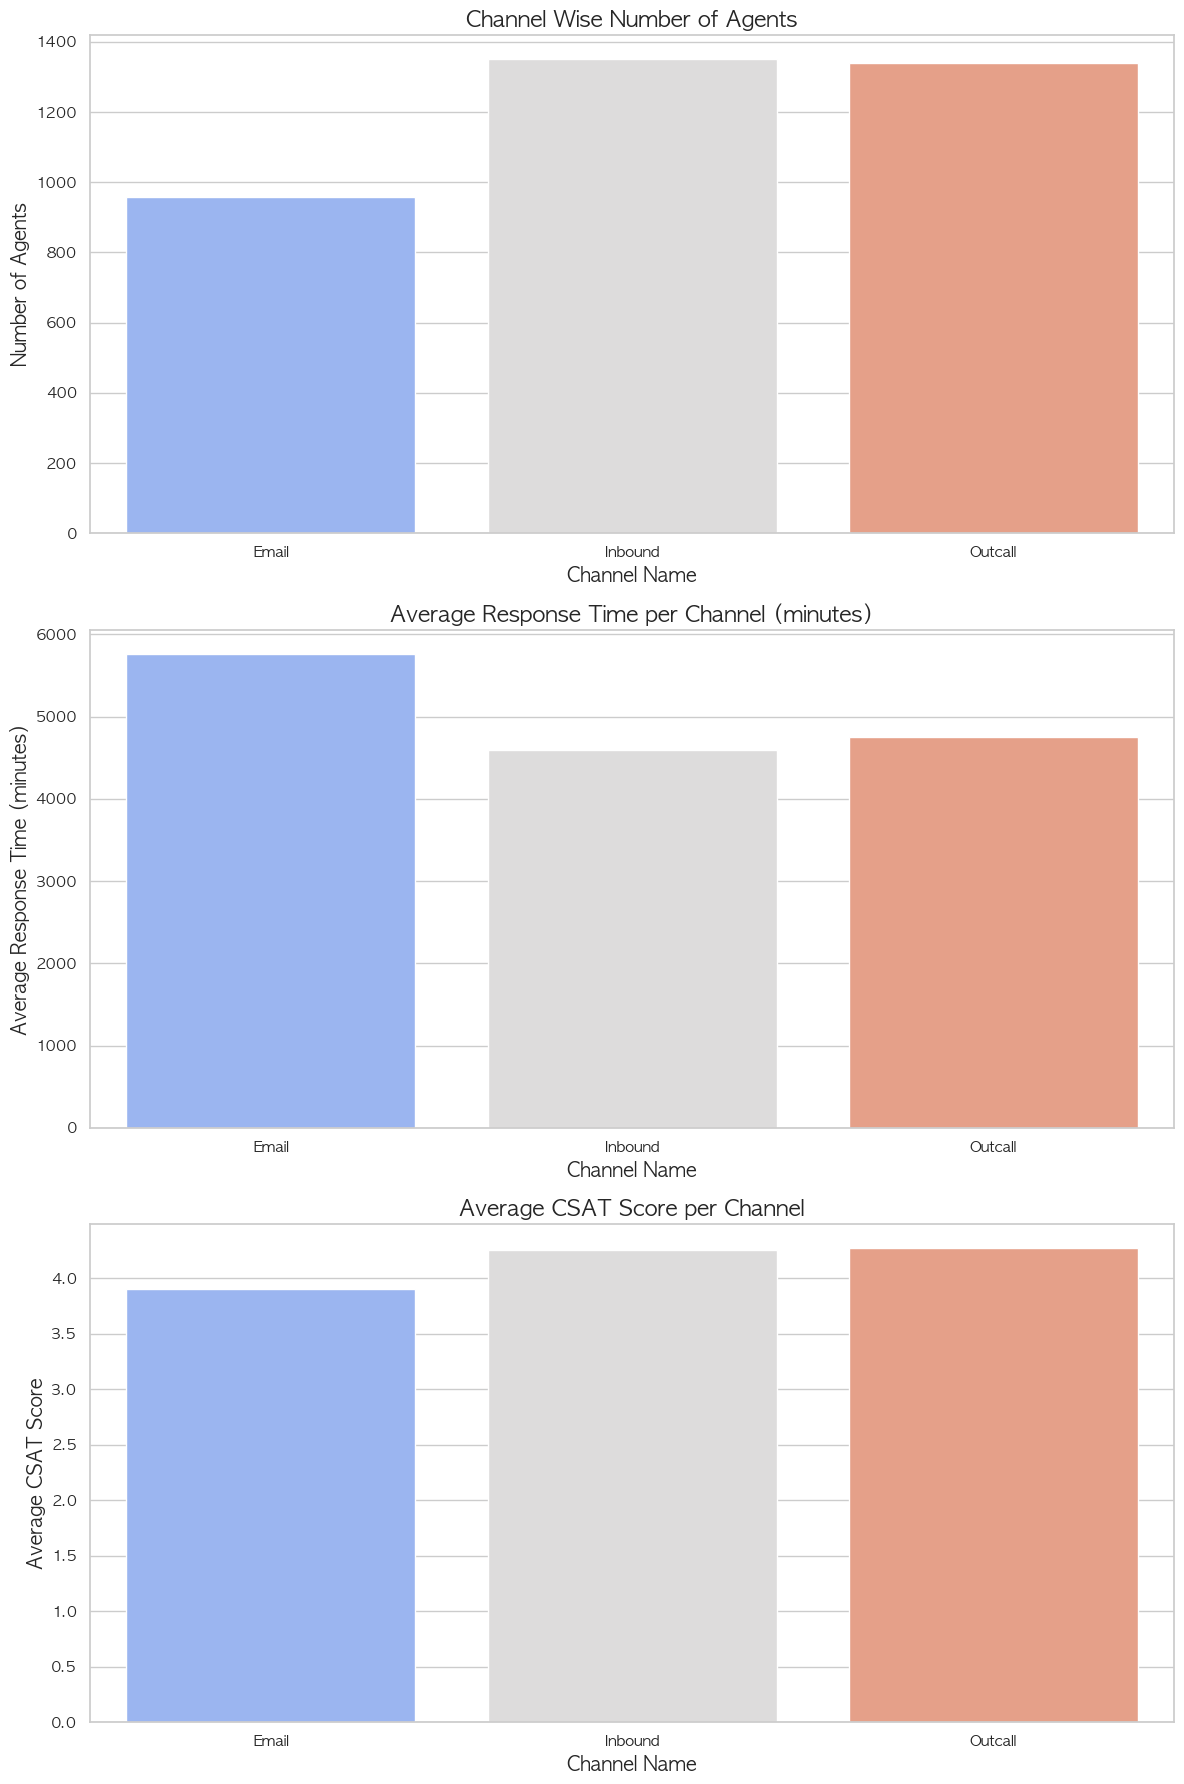

In [6]:
cs_data = cs.copy()

# 날짜 형식 파싱 (이전에 변환한 것을 확인하기 위해 다시 확인)
cs_data['Issue_reported at'] = pd.to_datetime(cs_data['Issue_reported at'], errors='coerce')
cs_data['issue_responded'] = pd.to_datetime(cs_data['issue_responded'], errors='coerce')

# 응답 시간 계산 (분 단위)
cs_data['Response Time'] = (cs_data['issue_responded'] - cs_data['Issue_reported at']).dt.total_seconds() / 60

# 1. 채널별 근무자 수
channel_agents_count = cs_data.groupby('channel_name')['Agent_name'].nunique()

# 2. 채널별 평균 응답시간
channel_avg_response_time = cs_data.groupby('channel_name')['Response Time'].mean()

# 3. 채널별 평균 고객 만족도 점수
channel_avg_csat_score = cs_data.groupby('channel_name')['CSAT Score'].mean()

# 시각화
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# 채널별 근무자 수
sns.barplot(x=channel_agents_count.index, y=channel_agents_count.values, palette=palette, ax=ax[0])
ax[0].set_title('Channel Wise Number of Agents', fontsize=16)
ax[0].set_xlabel('Channel Name', fontsize=14)
ax[0].set_ylabel('Number of Agents', fontsize=14)

# 채널별 평균 응답시간
sns.barplot(x=channel_avg_response_time.index, y=channel_avg_response_time.values, palette=palette, ax=ax[1])
ax[1].set_title('Average Response Time per Channel (minutes)', fontsize=16)
ax[1].set_xlabel('Channel Name', fontsize=14)
ax[1].set_ylabel('Average Response Time (minutes)', fontsize=14)

# 채널별 평균 고객 만족도 점수
sns.barplot(x=channel_avg_csat_score.index, y=channel_avg_csat_score.values, palette=palette, ax=ax[2])
ax[2].set_title('Average CSAT Score per Channel', fontsize=16)
ax[2].set_xlabel('Channel Name', fontsize=14)
ax[2].set_ylabel('Average CSAT Score', fontsize=14)

plt.tight_layout()
plt.show()

# 시간대별 고객 문의량, agent shift 확인

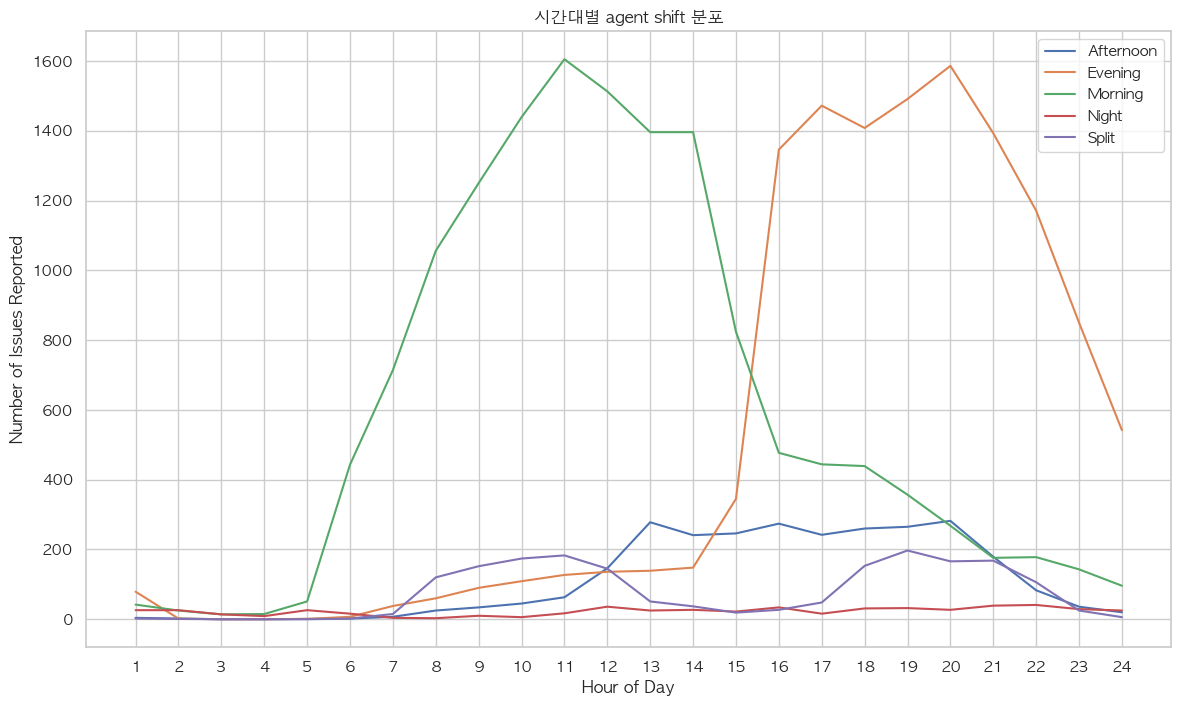

In [7]:
import datetime as dt

cs_data = cs.copy()

# Parse the 'Issue_reported at' to datetime
cs_data['Issue_reported_datetime'] = pd.to_datetime(cs_data['Issue_reported at'], errors='coerce')

# Extract the hour from the datetime
cs_data['Issue_hour'] = cs_data['Issue_reported_datetime'].dt.hour

# Check the relationship between Issue_hour and Agent Shift
agent_shift_comparison = pd.crosstab(cs_data['Issue_hour'], cs_data['Agent Shift'])

agent_shift_comparison.index = agent_shift_comparison.index.map(lambda x: 24 if x == 0 else x)

agent_shift_comparison.sort_index(inplace=True)

plt.figure(figsize=(14, 8))
for shift in agent_shift_comparison.columns:
    plt.plot(agent_shift_comparison.index, agent_shift_comparison[shift], label=shift)

plt.title('시간대별 agent shift 분포')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Issues Reported')
plt.xticks(range(1, 25))
plt.legend()
plt.grid(True)
plt.show()

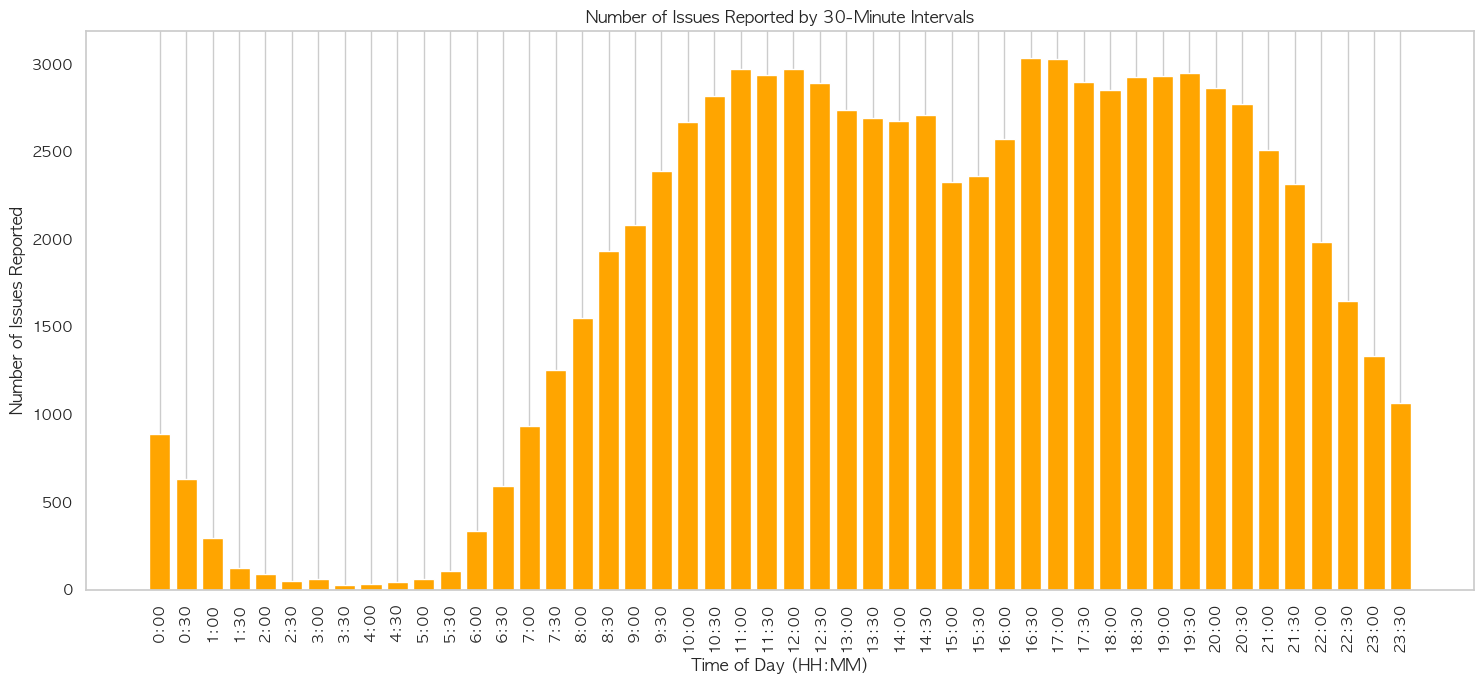

In [8]:
# to_datetime으로 데이터 형식 변화
cs_data['Issue_reported at'] = pd.to_datetime(cs_data['Issue_reported at'], format='%d/%m/%Y %H:%M')

# Create the 30-minute interval
cs_data['Hour Reported'] = cs_data['Issue_reported at'].dt.hour
cs_data['Minute Reported'] = cs_data['Issue_reported at'].dt.minute
cs_data['30_Min_Interval'] = cs_data['Hour Reported'] * 2 + cs_data['Minute Reported'] // 30

interval_issue_count = cs_data.groupby('30_Min_Interval').size().reset_index(name='Issue Count')

# Convert the interval back to a time format for plotting
interval_issue_count['Time'] = interval_issue_count['30_Min_Interval'].apply(lambda x: f"{x // 2}:{(x % 2) * 30:02d}")

# Plotting
plt.figure(figsize=(15, 7))
plt.bar(interval_issue_count['Time'], interval_issue_count['Issue Count'], color='orange')
plt.title('Number of Issues Reported by 30-Minute Intervals')
plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Number of Issues Reported')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 응답 시간별 고객 만족도 점수

/var/folders/2x/rgqmkhln4lq6_vy_fb_4rsxm0000gn/T/ipykernel_89587/4122649867.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diff_hours'] = df1['diff_seconds'] / 3600
/var/folders/2x/rgqmkhln4lq6_vy_fb_4rsxm0000gn/T/ipykernel_89587/4122649867.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Response Time Category'] = pd.cut(df1['diff_seconds'], bins=[0,7200, 14400, 21600, 43200, 86400,1000000], labels=['0-2 hours','2-4 hours', '4-6hours', '6-12hours', '12-24hours', '24hours +'])
/var/folde

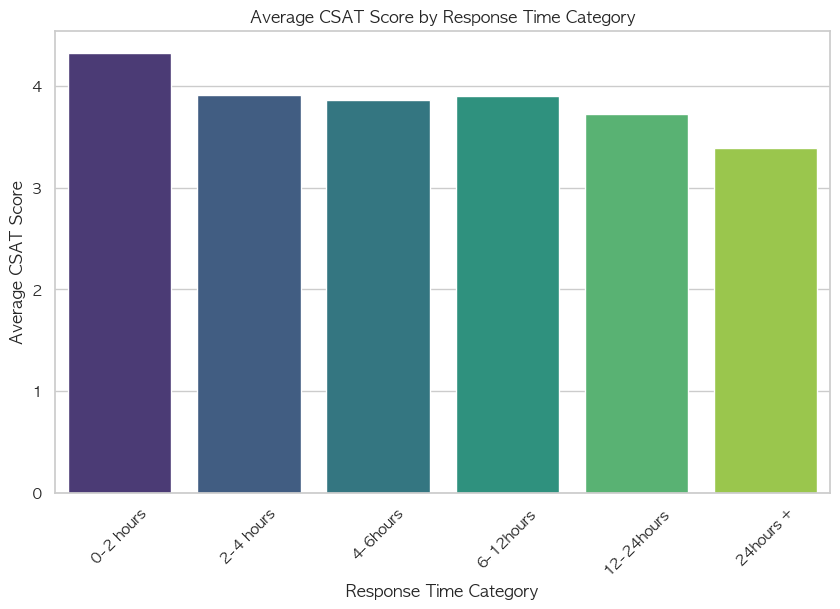

In [9]:
df = cs.copy()

#날짜 문자열 형식을 %Y-%m-%d %H:%M 형식으로 변환
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M')
df['issue_responded']=pd.to_datetime(df['issue_responded'], dayfirst = True).dt.strftime('%Y-%m-%d %H:%M')

#날짜 문자열을 datetime 형식으로 변환
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'])
df['issue_responded'] = pd.to_datetime(df['issue_responded'])

#응답소요시간을 나타내는 diff 컬럼 추가 
df['diff2'] = df['issue_responded'] - df['Issue_reported at']
df.insert(9,'diff',df['diff2'])
df.drop(columns = 'diff2',inplace = True)

#datetime diff를 초로 변환
df['diff_seconds'] = df['diff'].dt.total_seconds()

#df1은 응답시간이 음수인 행들 제외한 테이블
df1 = df[df.diff_seconds >= 0]

# diff_seconds를 시간 단위로 변환하여 새로운 열 추가 (초 단위를 시간 단위로 변환)
df1['diff_hours'] = df1['diff_seconds'] / 3600

df1['Response Time Category'] = pd.cut(df1['diff_seconds'], bins=[0,7200, 14400, 21600, 43200, 86400,1000000], labels=['0-2 hours','2-4 hours', '4-6hours', '6-12hours', '12-24hours', '24hours +'])
df1.groupby('Response Time Category').count()

response_time_counts = df1['Response Time Category'].value_counts()

# response time category에 따른 CSAT 점수 별로 데이터프레임을 그룹화하여 평균 계산
csat_by_response_time = df1.groupby('Response Time Category')['CSAT Score'].mean().reset_index()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x='Response Time Category', y='CSAT Score', data=csat_by_response_time, palette='viridis')

# 그래프 제목과 축 레이블 추가
plt.title('Average CSAT Score by Response Time Category')
plt.xlabel('Response Time Category')
plt.ylabel('Average CSAT Score')

# x축 눈금 레이블 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

# 30분 간격 고객 평균 만족도

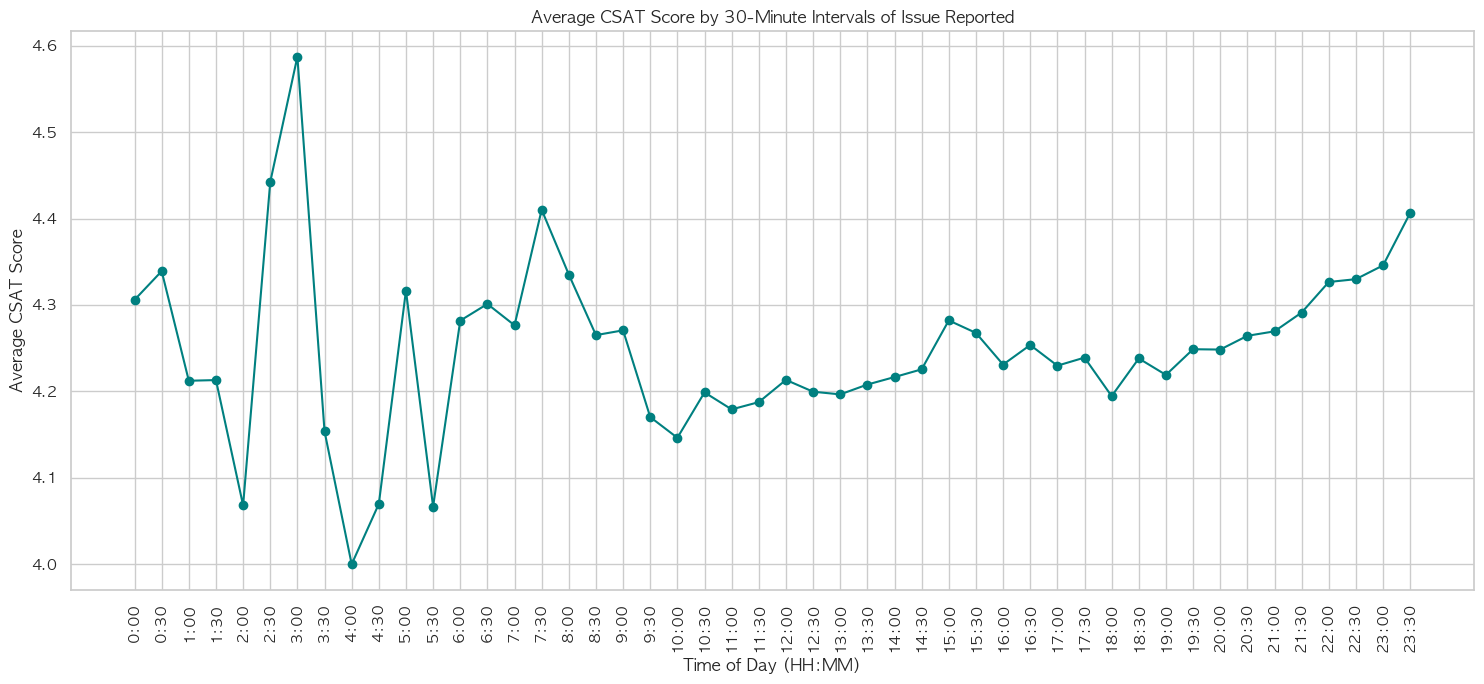

In [10]:
# Group by the 30-minute interval and calculate the average CSAT score
interval_csat_avg = cs_data.groupby('30_Min_Interval')['CSAT Score'].mean().reset_index()

# Convert the interval back to a time format for plotting
interval_csat_avg['Time'] = interval_csat_avg['30_Min_Interval'].apply(lambda x: f"{x // 2}:{(x % 2) * 30:02d}")

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(interval_csat_avg['Time'], interval_csat_avg['CSAT Score'], marker='o', linestyle='-', color='teal')
plt.title('Average CSAT Score by 30-Minute Intervals of Issue Reported')
plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# 근무시간 별 고객 만족도 점수

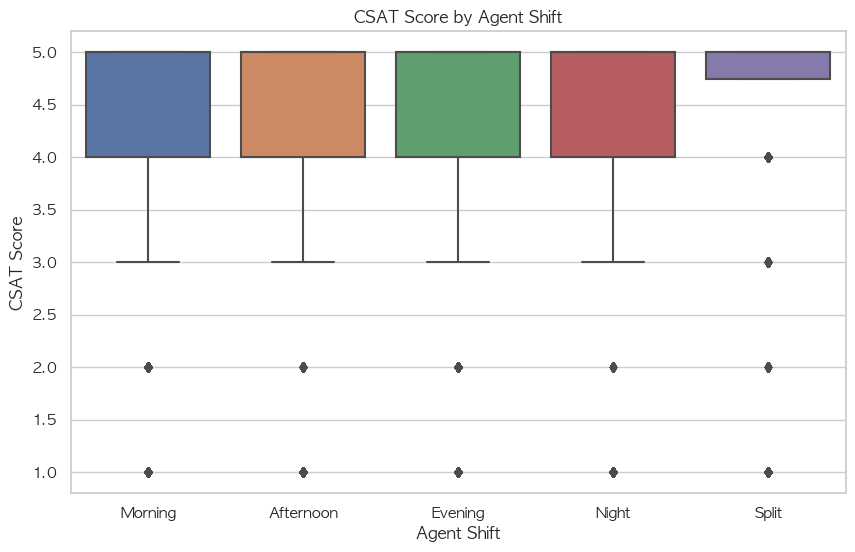

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=cs, order=['Morning', 'Afternoon', 'Evening', 'Night', 'Split'])
plt.title('CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

# 시간대별 문의에 대한 응답속도(95% 신뢰구간)

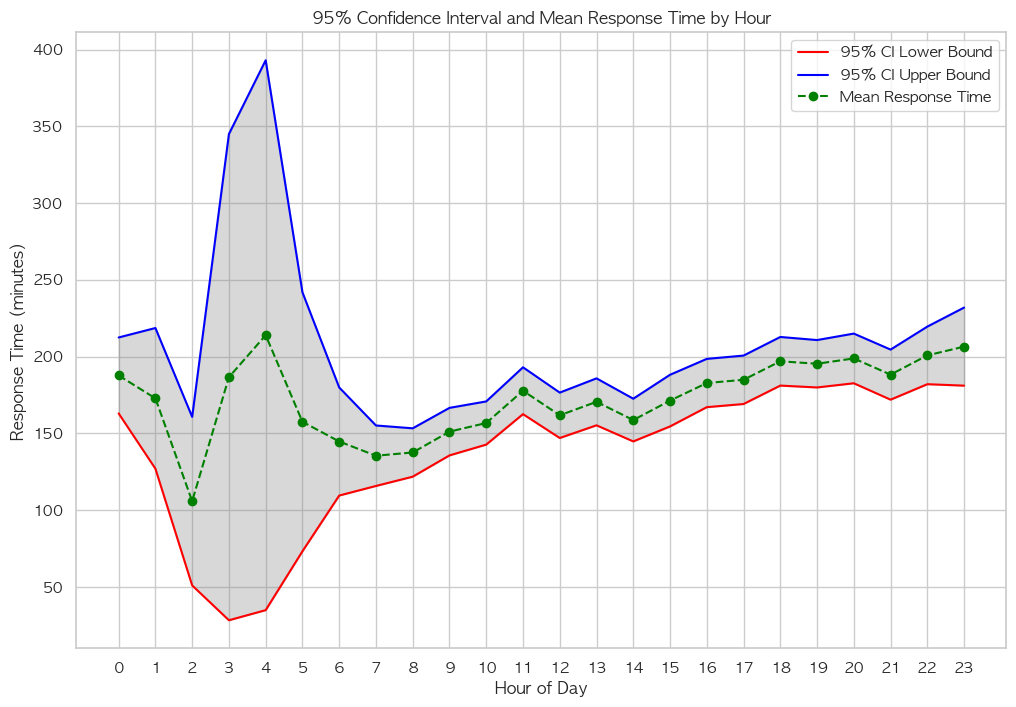

In [12]:
# 'Issue_reported at'과 'issue_responded' 열을 날짜/시간 형식으로 변환합니다. 올바른 날짜 형식을 지정합니다.
cs['Issue_reported at'] = pd.to_datetime(cs['Issue_reported at'], format='%d/%m/%Y %H:%M', errors='coerce')
cs['issue_responded'] = pd.to_datetime(cs['issue_responded'], format='%d/%m/%Y %H:%M', errors='coerce')

# 응답 시간을 분 단위로 계산합니다.
cs['response_time_minutes'] = (cs['issue_responded'] - cs['Issue_reported at']).dt.total_seconds() / 60

# 응답 시간이 음수인 행을 제거합니다.
cs = cs[cs['response_time_minutes'] >= 0]

# 각 시간대별로 데이터를 그룹화하고 95% 신뢰구간을 계산합니다.
cs['hour'] = cs['Issue_reported at'].dt.hour
def confidence_interval(data):
    mean = np.mean(data)
    sem = stats.sem(data)  # 표준 오차
    return stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
response_time_ci = cs.groupby('hour')['response_time_minutes'].apply(confidence_interval)

# 하한과 상한 신뢰 구간을 추출합니다.
ci_lower = [ci[0] for ci in response_time_ci]
ci_upper = [ci[1] for ci in response_time_ci]
mean_response_time = cs.groupby('hour')['response_time_minutes'].mean()
hours = response_time_ci.index

plt.figure(figsize=(12, 8))
plt.plot(hours, ci_lower, label='95% CI Lower Bound', color='red')
plt.plot(hours, ci_upper, label='95% CI Upper Bound', color='blue')
plt.plot(hours, mean_response_time, label='Mean Response Time', color='green', linestyle='--', marker='o')
plt.fill_between(hours, ci_lower, ci_upper, color='gray', alpha=0.3)
plt.xlabel('Hour of Day')
plt.ylabel('Response Time (minutes)')
plt.title('95% Confidence Interval and Mean Response Time by Hour')
plt.legend()
plt.grid(True)
plt.xticks(hours)  # Ensure all hours are shown
plt.show()

# 보고된 이슈 시간별 카테고리의 누적 수

<Figure size 1400x800 with 0 Axes>

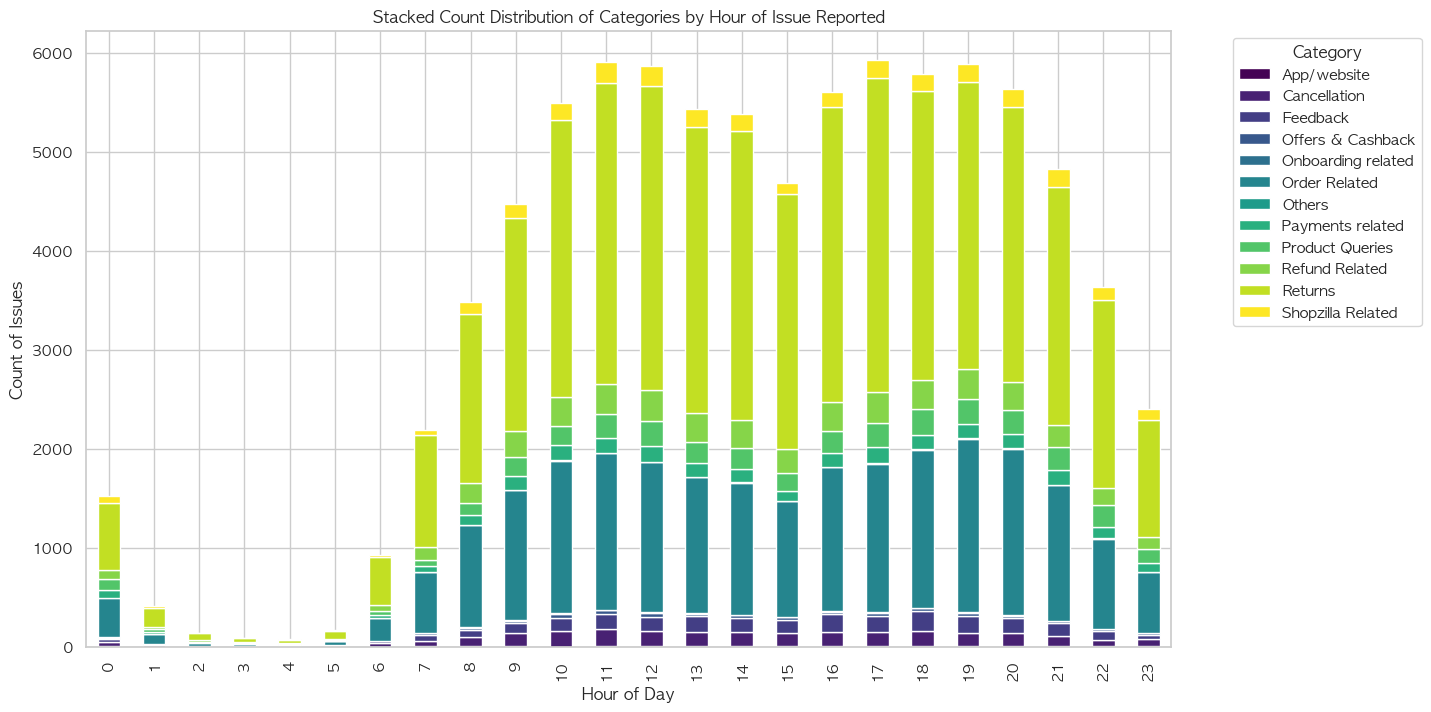

In [13]:
# Group by Issue_hour and Category to see the distribution
category_distribution = cs_data.groupby(['Hour Reported', 'category']).size().unstack(fill_value=0)

# Calculate the percentage of each category per hour
category_percentage = category_distribution.div(category_distribution.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
category_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Stacked Count Distribution of Categories by Hour of Issue Reported')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Issues')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.show()

# 카테고리별 시간대에 따른 조회

## 문의수 확인

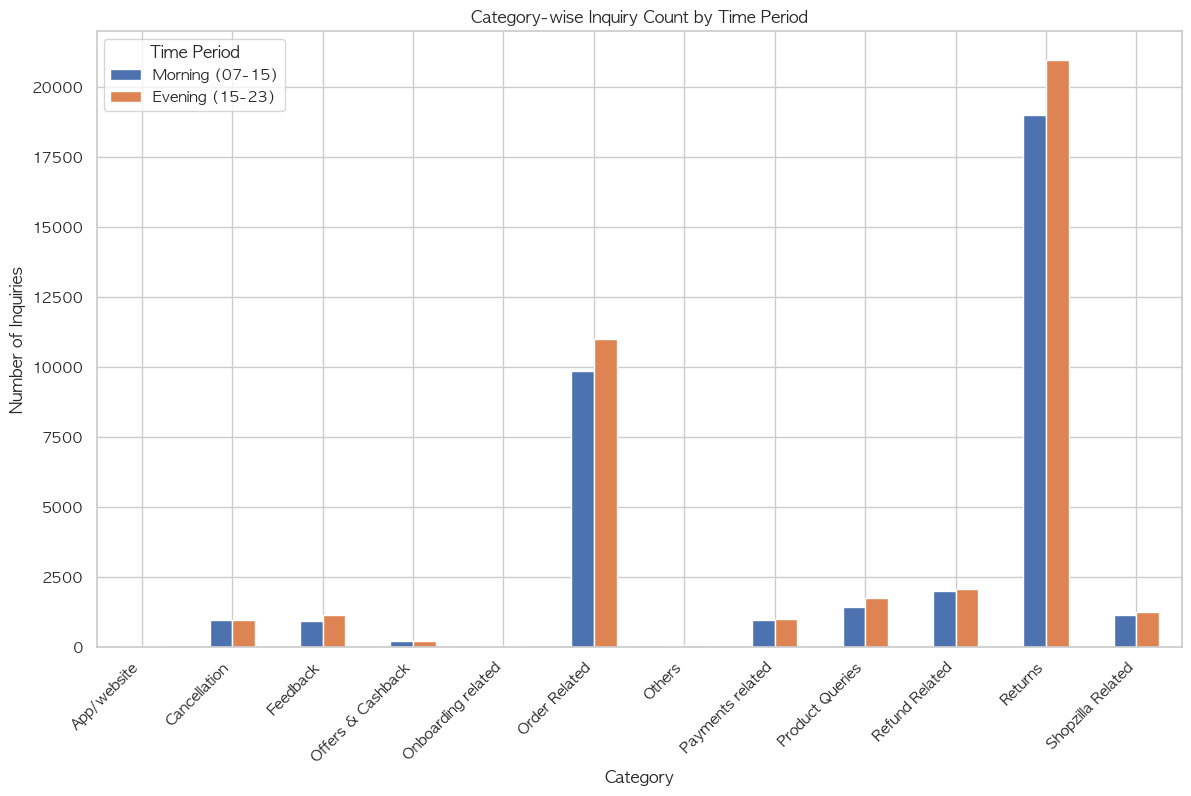

In [14]:
morning_shift = cs[(cs['Issue_reported at'].dt.hour >= 7) & (cs['Issue_reported at'].dt.hour < 15)]
evening_shift = cs[(cs['Issue_reported at'].dt.hour >= 15) & (cs['Issue_reported at'].dt.hour < 23)]

morning_categories = morning_shift['category'].value_counts()
evening_categories = evening_shift['category'].value_counts()

category_comparison = pd.DataFrame({
    'Morning (07-15)': morning_categories,
    'Evening (15-23)': evening_categories
})

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
category_comparison.plot(kind='bar', ax=ax)
ax.set_title('Category-wise Inquiry Count by Time Period')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Inquiries')
ax.legend(title='Time Period')
plt.xticks(rotation=45, ha='right')
plt.show()

## 문의비율 확인

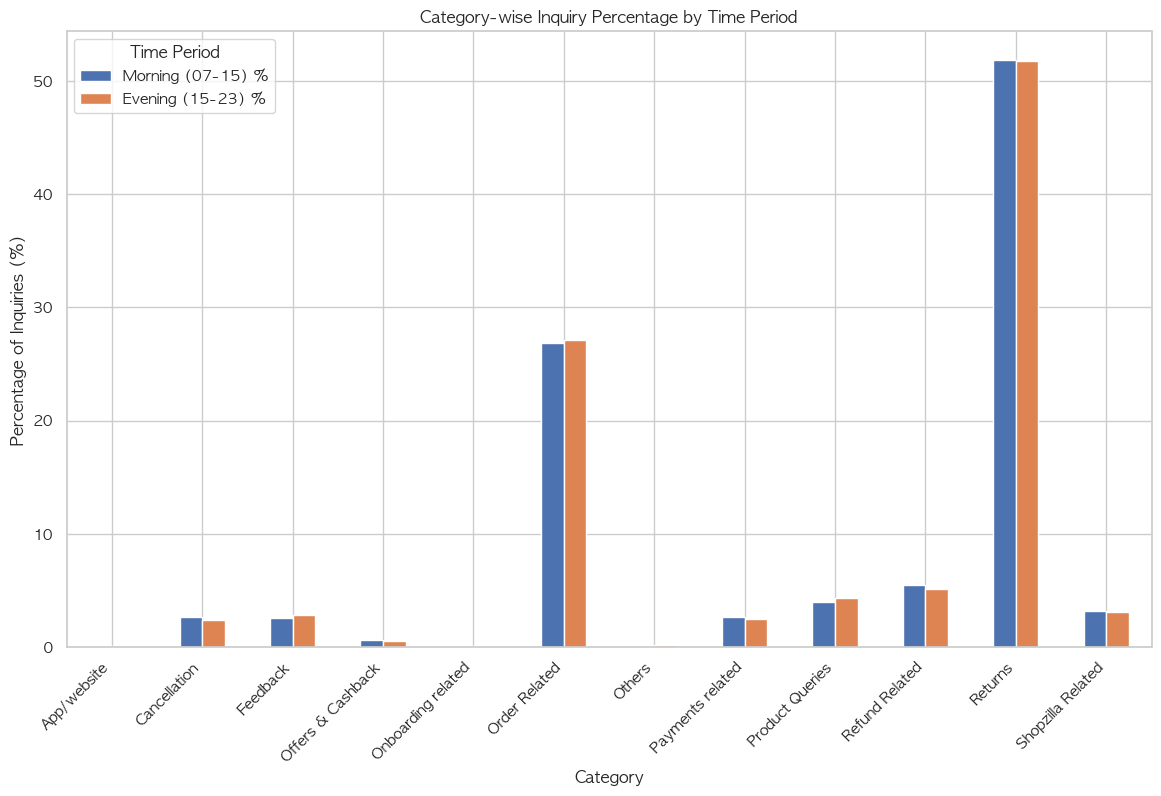

In [15]:
category_comparison['Morning (07-15) %'] = (category_comparison['Morning (07-15)'] / category_comparison['Morning (07-15)'].sum()) * 100
category_comparison['Evening (15-23) %'] = (category_comparison['Evening (15-23)'] / category_comparison['Evening (15-23)'].sum()) * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
category_comparison[['Morning (07-15) %', 'Evening (15-23) %']].plot(kind='bar', ax=ax)
ax.set_title('Category-wise Inquiry Percentage by Time Period')
ax.set_xlabel('Category')
ax.set_ylabel('Percentage of Inquiries (%)')
ax.legend(title='Time Period')
plt.xticks(rotation=45, ha='right')
plt.show()

# 데이터 초기화

In [16]:
cs = pd.read_csv('Customer_support_data.csv')

# 문의별 응답시간 확인

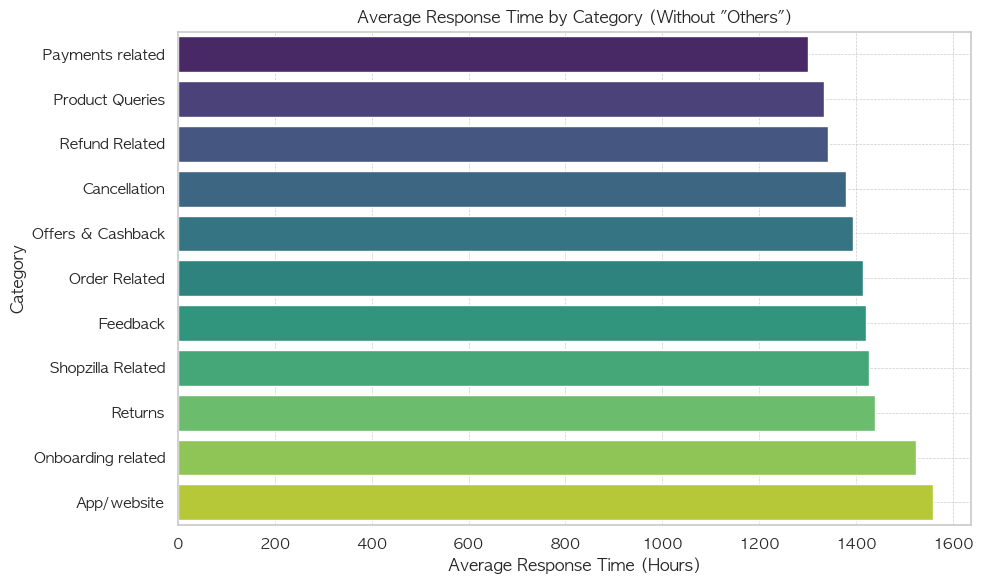

In [17]:
# 날짜 형식 파싱 (이전에 변환한 것을 확인하기 위해 다시 확인)
cs_data['Issue_reported at'] = pd.to_datetime(cs_data['Issue_reported at'], errors='coerce')
cs_data['issue_responded'] = pd.to_datetime(cs_data['issue_responded'], errors='coerce')

# 응답 시간 계산 (분 단위)
cs_data['response_time_hours'] = (cs_data['issue_responded'] - cs_data['Issue_reported at']).dt.total_seconds() / 3600

# Remove entries with negative response times
positive_response_data = cs_data[cs_data['response_time_hours'] > 0]

# Recalculate the average response time by category
positive_category_response_times = positive_response_data.groupby('category')['response_time_hours'].mean().sort_values().reset_index()


# Remove 'Others' category and recalculate the average response time by category
filtered_response_data = positive_response_data[positive_response_data['category'] != 'Others']
filtered_category_response_times = filtered_response_data.groupby('category')['response_time_hours'].mean().sort_values().reset_index()

# Plot the results without the 'Others' category
plt.figure(figsize=(10, 6))
sns.barplot(x='response_time_hours', y='category', data=filtered_category_response_times, palette='viridis')
plt.title('Average Response Time by Category (Without "Others")')
plt.xlabel('Average Response Time (Hours)')
plt.ylabel('Category')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# sub category 별 응답속도 확인

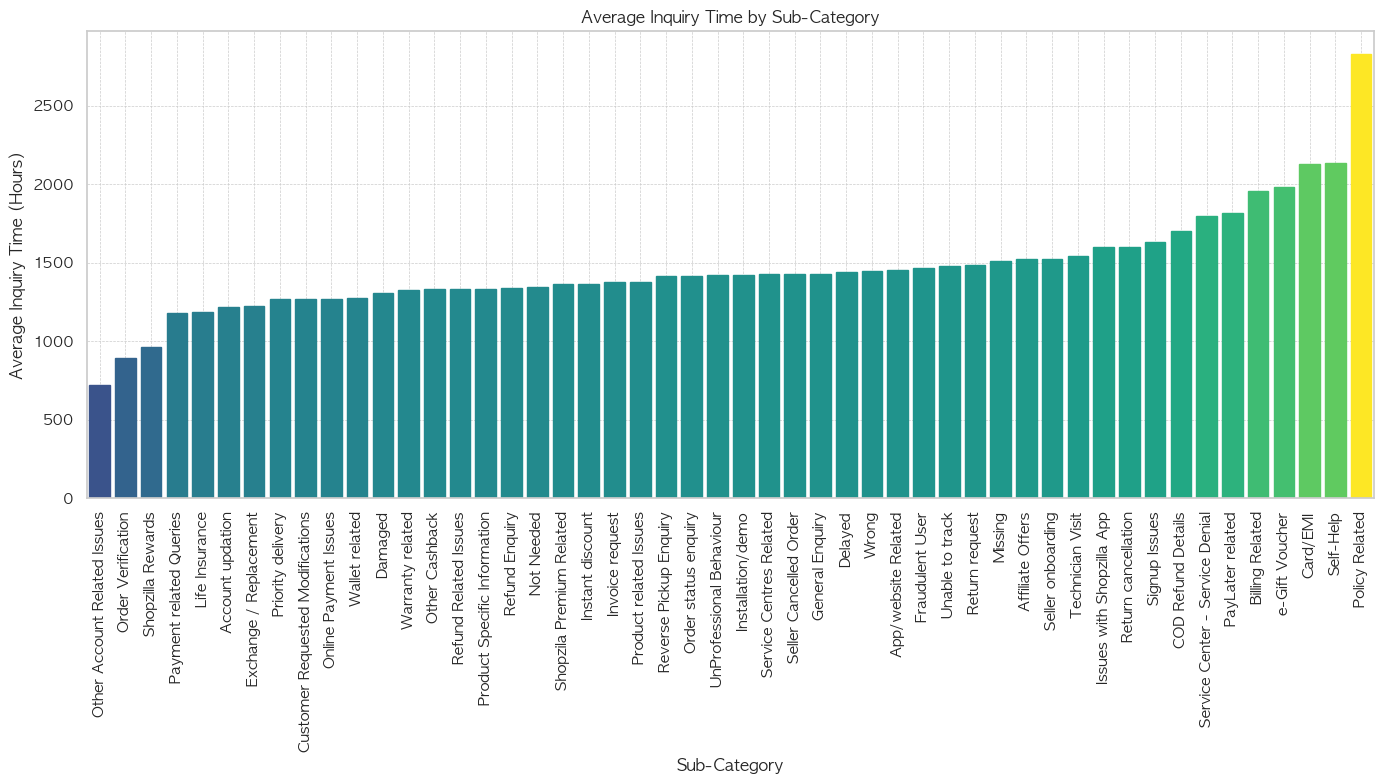

In [18]:
# Recalculate the average response time by sub-category
sub_category_response_times = filtered_response_data.groupby('Sub-category')['response_time_hours'].mean().sort_values().reset_index()

# Plot the results
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Sub-category', y='response_time_hours', data=sub_category_response_times, palette='Spectral')
plt.title('Average Inquiry Time by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Inquiry Time (Hours)')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Color the bars in the barplot based on their height
for bar in barplot.patches:
    bar.set_color(plt.cm.viridis(bar.get_height()/max(sub_category_response_times['response_time_hours'])))

plt.show()

In [19]:
# 응답 시간을 계산 (분 단위)
cs_data['response_time_minutes'] = (cs_data['issue_responded'] - cs_data['Issue_reported at']).dt.total_seconds() / 60

# 전체 응답시간 평균 계산
overall_response_time_mean = cs_data['response_time_minutes'].mean()

# 'policy related' 및 'app/website related' 제외한 응답시간 평균 계산
filtered_response_time_mean = cs_data[~cs_data['Sub-category'].isin(['policy related', 'app/website related'])]['response_time_minutes'].mean()

overall_response_time_mean, filtered_response_time_mean

(-50168.669907480005, -50168.669907480005)

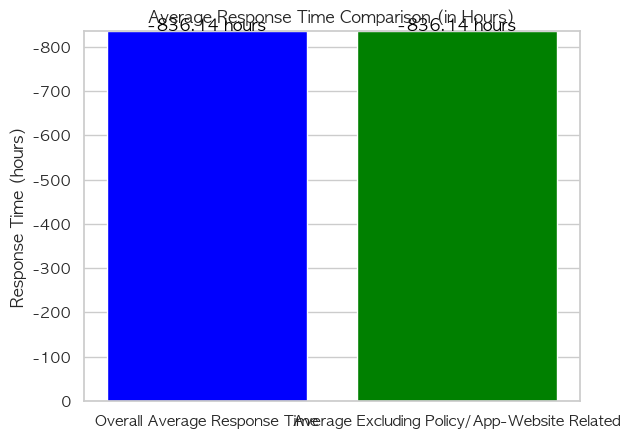

In [20]:
mean_times = {
    'Overall Average Response Time': overall_response_time_mean,
    'Average Excluding Policy/App-Website Related': filtered_response_time_mean
}

# 시간 단위로 변환 (분을 시간으로)
mean_times_hours = {key: value / 60 for key, value in mean_times.items()}

# 바 차트로 시각화
fig, ax = plt.subplots()
ax.bar(mean_times_hours.keys(), mean_times_hours.values(), color=['blue', 'green'])

# 평균값 표시 (시간 단위)
for i, v in enumerate(mean_times_hours.values()):
    ax.text(i, v + 0.1, f'{v:.2f} hours', ha='center', color='black')

plt.title('Average Response Time Comparison (in Hours)')
plt.ylabel('Response Time (hours)')
plt.ylim(0, max(mean_times_hours.values()) + 1)  # Add some space above the highest bar for annotations
plt.show()


## 서브 카테고리별 문의량

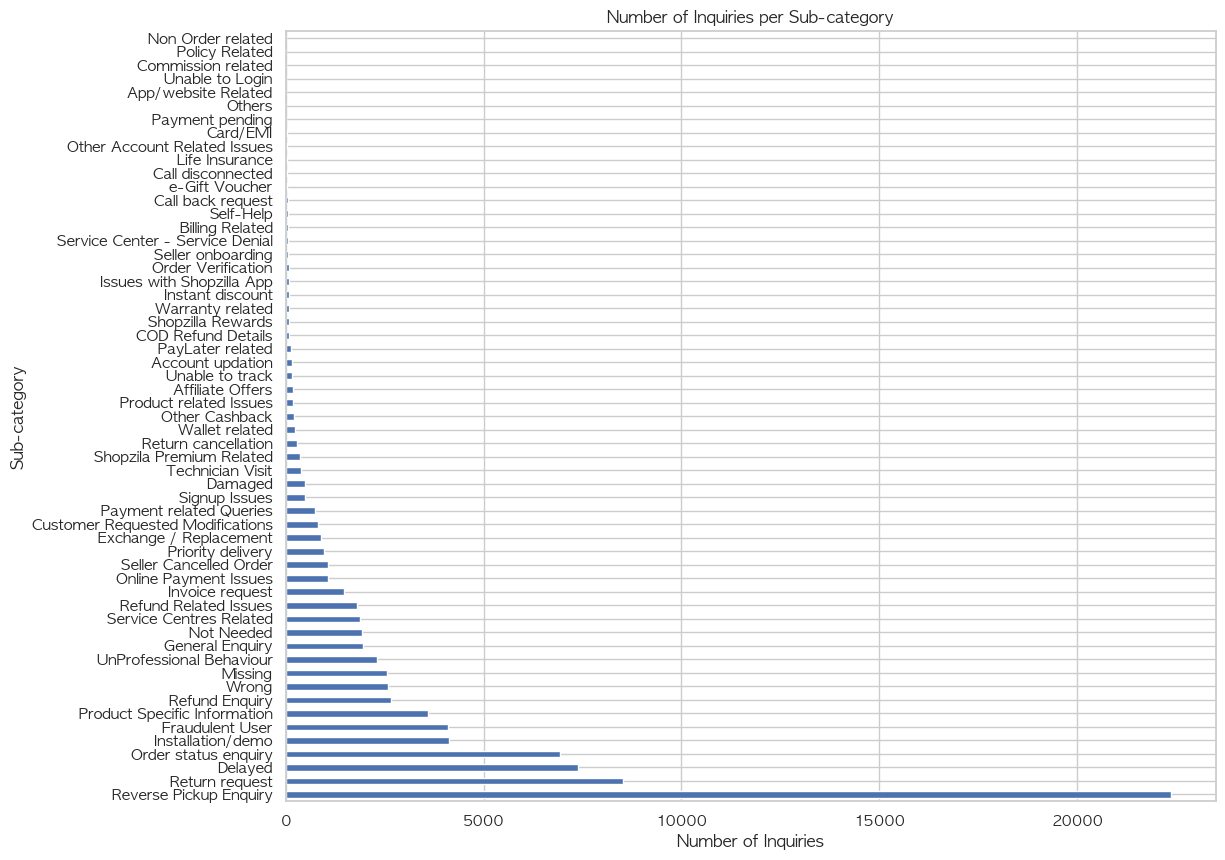

In [21]:
# Count the number of inquiries for each subcategory
subcategory_counts = cs_data['Sub-category'].value_counts()

plt.figure(figsize=(12, 10))
subcategory_counts.plot(kind='barh')
plt.title('Number of Inquiries per Sub-category')
plt.xlabel('Number of Inquiries')
plt.ylabel('Sub-category')
plt.grid(True)
plt.show()

# 문의량 * 응답시간 확인해보기

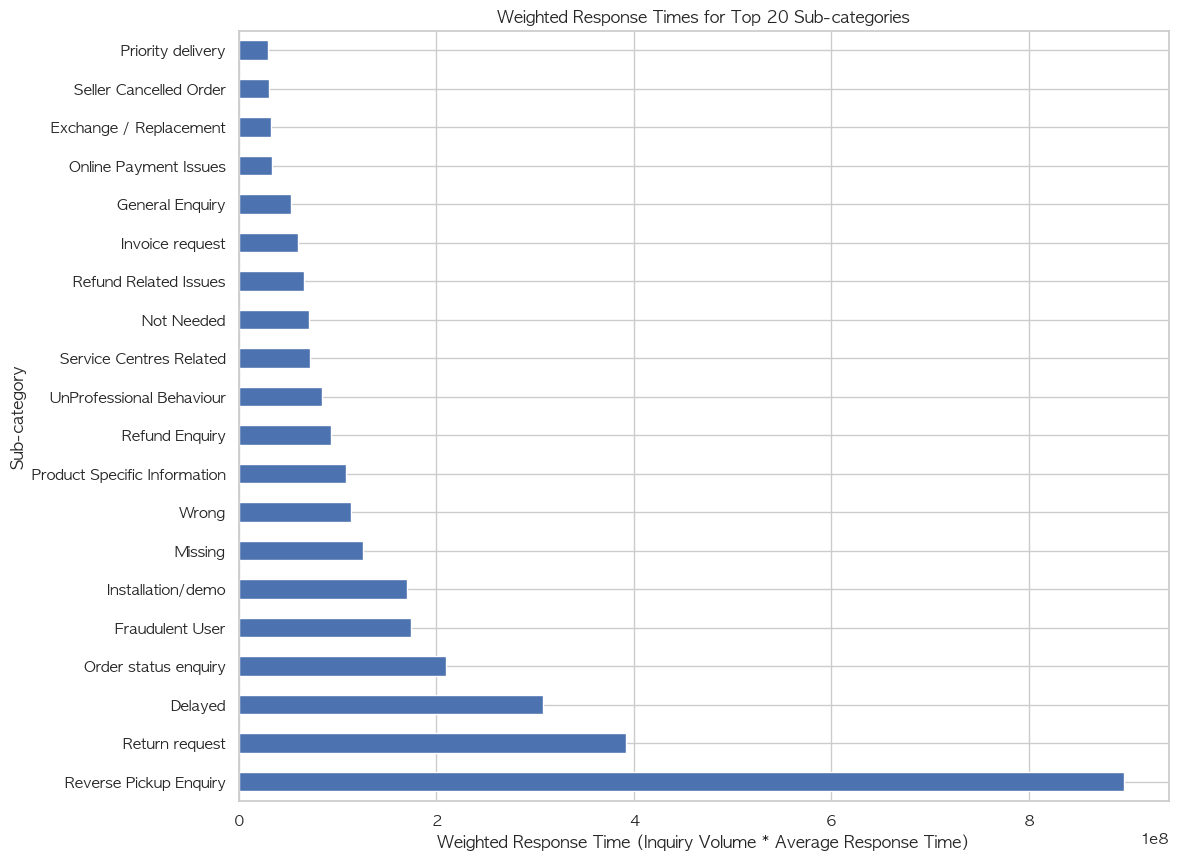

In [23]:
# Convert timestamps to datetime
cs_data['Issue_reported_at'] = pd.to_datetime(cs_data['Issue_reported at'], errors='coerce')
cs_data['issue_responded_at'] = pd.to_datetime(cs_data['issue_responded'], errors='coerce')

# Calculate response time in minutes
cs_data['response_time_minutes'] = (cs_data['issue_responded_at'] - cs_data['Issue_reported_at']).dt.total_seconds() / 60

# Ensure response time is non-negative
cs_data['response_time_minutes'] = cs_data['response_time_minutes'].apply(lambda x: max(x, 0))

# Calculate weighted response time by multiplying the response time by inquiry count for each subcategory
weighted_response_time = cs_data.groupby('Sub-category')['response_time_minutes'].mean() * subcategory_counts

weighted_response_time.sort_values(ascending=False, inplace=True)

# Plotting the weighted response times for subcategories
plt.figure(figsize=(12, 10))
weighted_response_time.head(20).plot(kind='barh')  # Display top 20 for better visualization
plt.title('Weighted Response Times for Top 20 Sub-categories')
plt.xlabel('Weighted Response Time (Inquiry Volume * Average Response Time)')
plt.ylabel('Sub-category')
plt.grid(True)
plt.show()

# 상위 7개 서브카테고리와 전체의 응답시간 비교

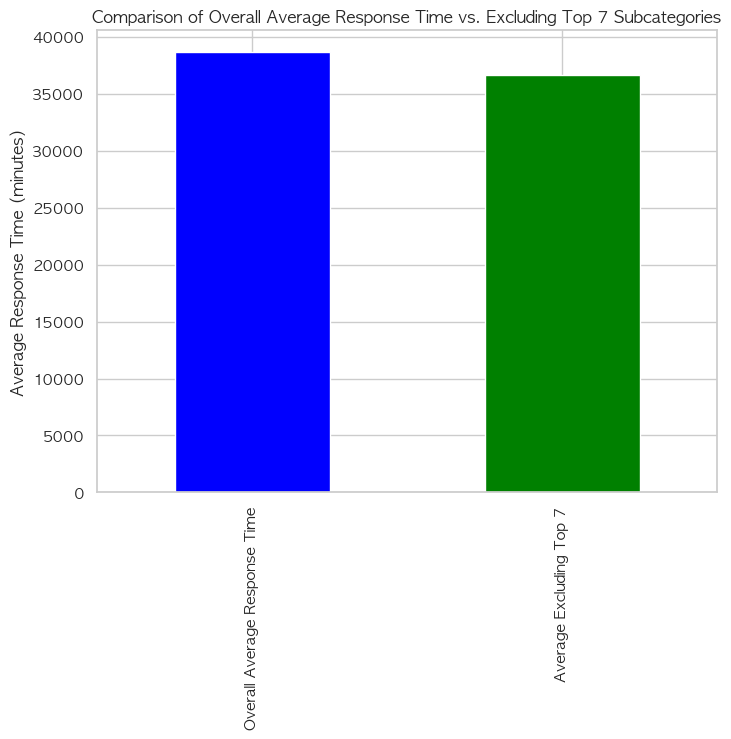

In [30]:
overall_average_response_time = cs_data['response_time_minutes'].mean()

top_7_subcategories = ['Reverse Pickup Enquiry', 
'Return request', 
'Delayed', 
'Fraudulent User', 
'Order status enquiry', 
'Product Specific Information',
'Installation/demo']

# Assuming 'top_7_subcategories' are already identified
non_top_7_subcategories = cs_data[~cs_data['Sub-category'].isin(top_7_subcategories)]

# Calculate the average response time excluding the top 7 subcategories
average_response_time_excluding_top_7 = non_top_7_subcategories['response_time_minutes'].mean()

average_comparison_excluding_top_7 = pd.Series({
    'Overall Average Response Time': overall_average_response_time,
    'Average Excluding Top 7': average_response_time_excluding_top_7
})

average_comparison_excluding_top_7.plot(kind='bar', color=['blue', 'green'], figsize=(8, 6))
plt.title('Comparison of Overall Average Response Time vs. Excluding Top 7 Subcategories')
plt.ylabel('Average Response Time (minutes)')
plt.grid(True)
plt.show()

# 카테고리별 고객만족도 점수 확인

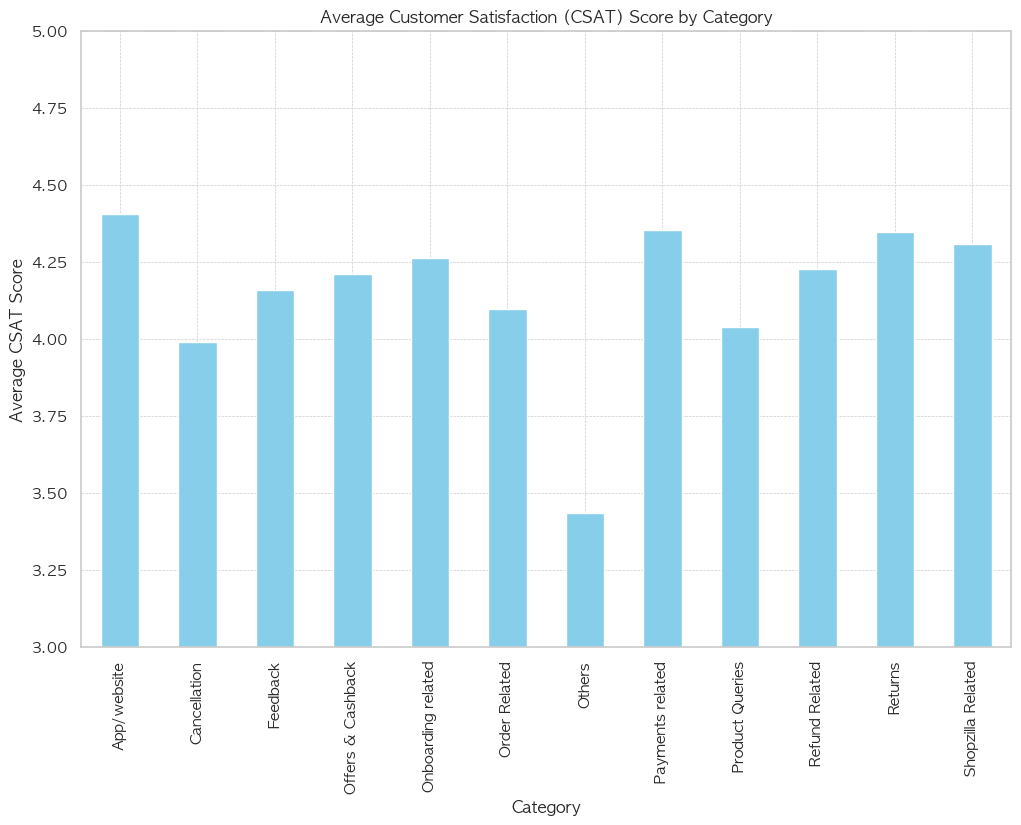

In [32]:
average_csat_by_category = cs_data.groupby('category')['CSAT Score'].mean()

average_csat_by_category.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Average Customer Satisfaction (CSAT) Score by Category')
plt.xlabel('Category')
plt.ylabel('Average CSAT Score')
plt.ylim(3, 5)  # Set y-axis limits to show CSAT range more clearly
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# 카테고리별 문의량

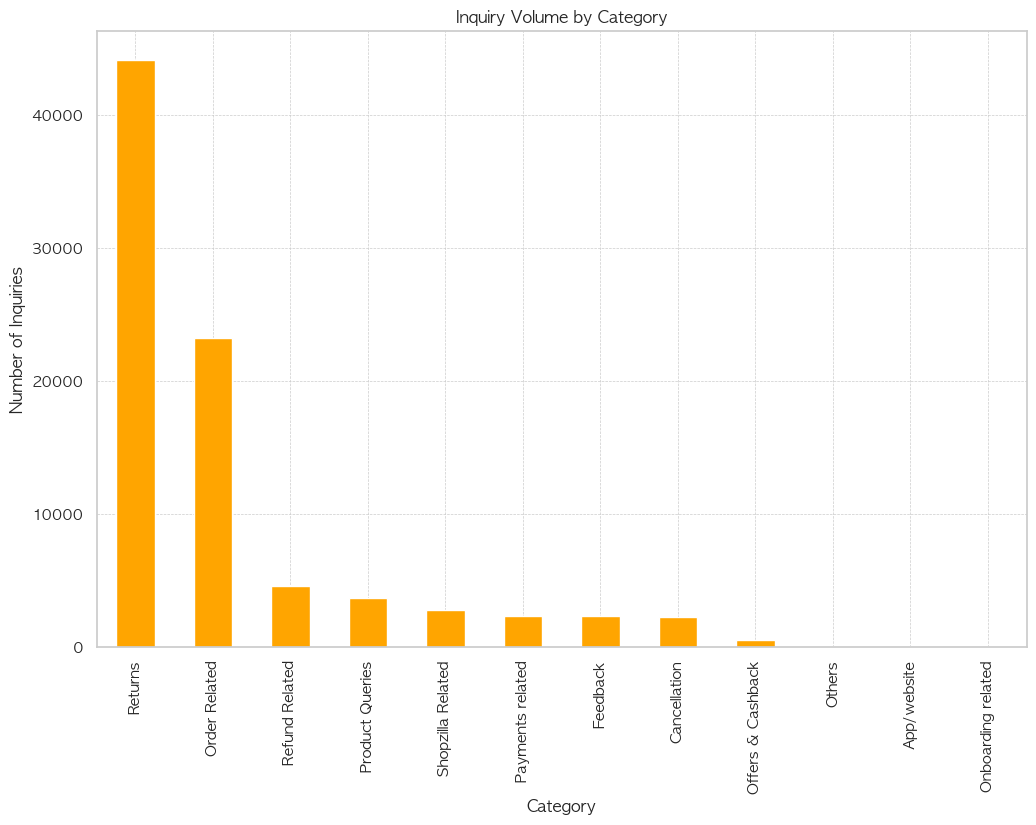

In [34]:
inquiry_volume_by_category = cs_data['category'].value_counts()

# Plotting the inquiry volume by category
inquiry_volume_by_category.plot(kind='bar', figsize=(12, 8), color='orange')
plt.title('Inquiry Volume by Category')
plt.xlabel('Category')
plt.ylabel('Number of Inquiries')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

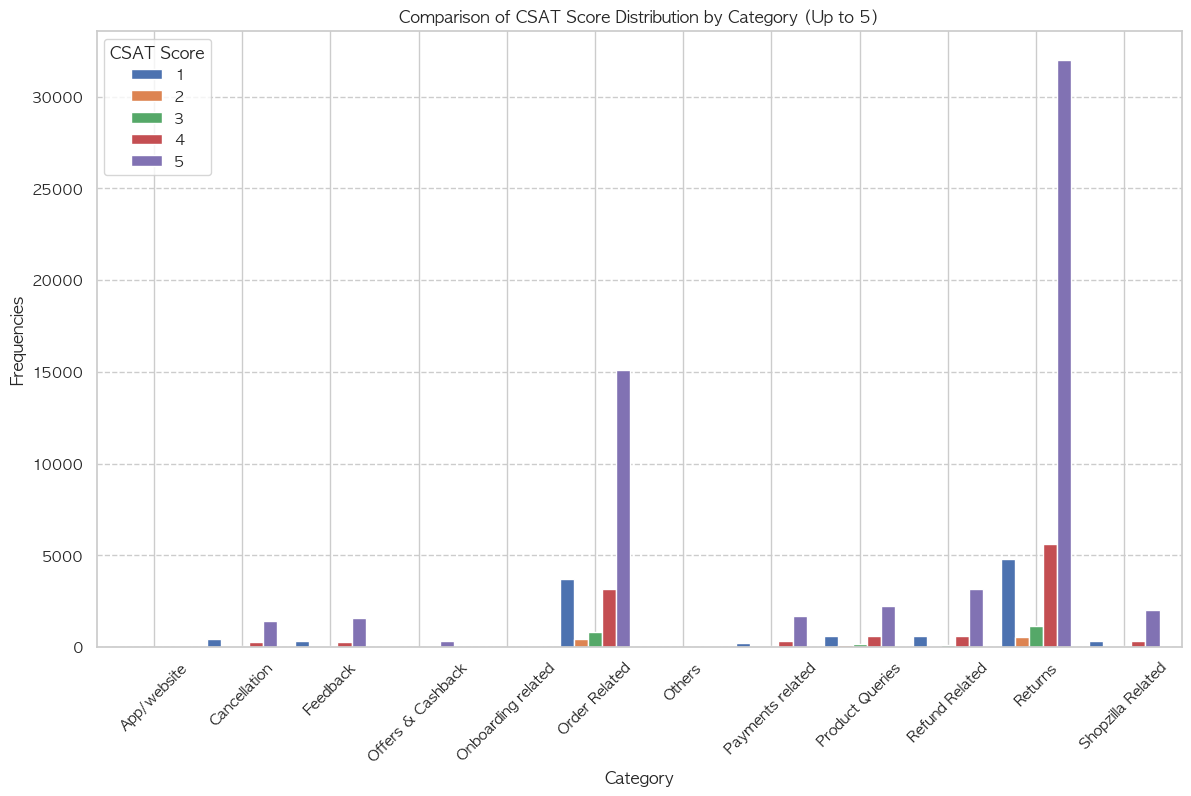

In [40]:
csat_distribution = cs_data.groupby(['category', 'CSAT Score']).size().unstack(fill_value=0)

# Plot a grouped bar chart for CSAT score distribution by category
ax = csat_distribution.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Comparison of CSAT Score Distribution by Category (Up to 5)')
plt.xlabel('Category')
plt.ylabel('Frequencies')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.legend(title='CSAT Score')
plt.grid(axis='y', linestyle='--')
plt.show()

# 근속기간 별 고객만족도

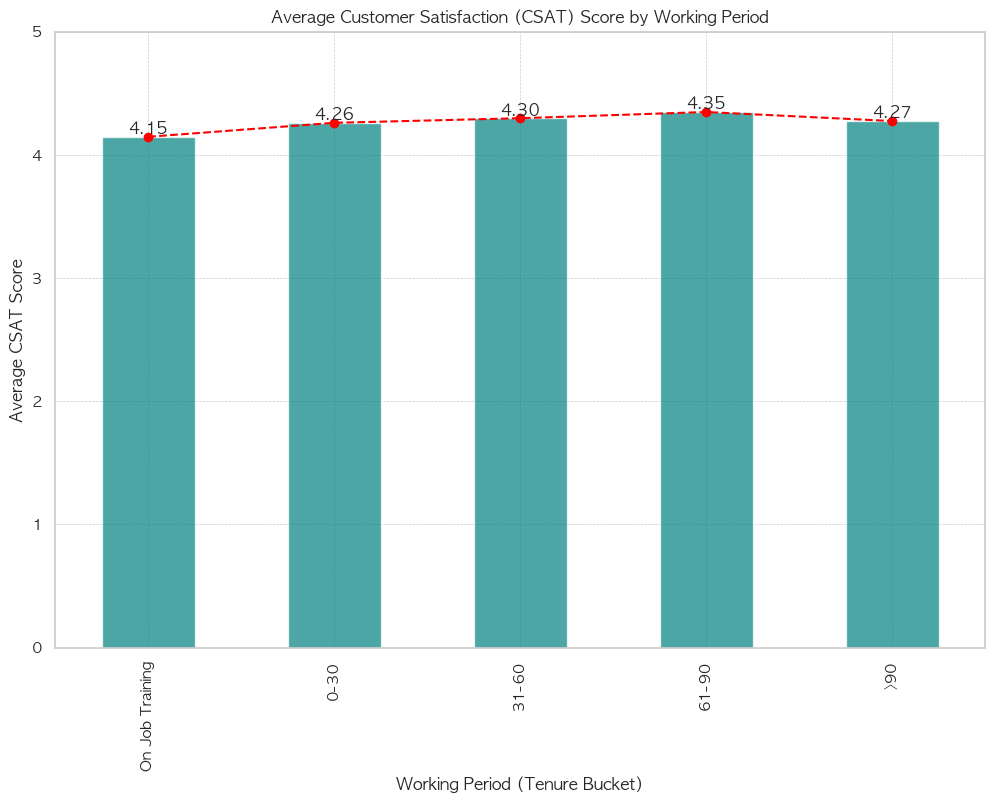

In [42]:
# Reorder 'On Job Training' to the first position
average_csat_by_tenure = cs_data.groupby('Tenure Bucket')['CSAT Score'].mean()

ordered_tenure_buckets = ['On Job Training'] + [x for x in average_csat_by_tenure.index if x != 'On Job Training']
average_csat_by_tenure = average_csat_by_tenure.reindex(ordered_tenure_buckets)

# Plotting the reordered average CSAT Score by tenure bucket
plt.figure(figsize=(12, 8))
average_csat_by_tenure.plot(kind='bar', color='teal', alpha=0.7)

# Connect the average points with a line plot
plt.plot(average_csat_by_tenure.index, average_csat_by_tenure, linestyle='--', marker='o', color='red')

# Annotate the average value on each bar
for index, value in enumerate(average_csat_by_tenure):
    plt.text(index, value, f'{value:.2f}', horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500})

plt.title('Average Customer Satisfaction (CSAT) Score by Working Period')
plt.xlabel('Working Period (Tenure Bucket)')
plt.ylabel('Average CSAT Score')
plt.ylim(0, 5)  # CSAT scores typically range from 1 to 5
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# 근속기간별 근무자 비율

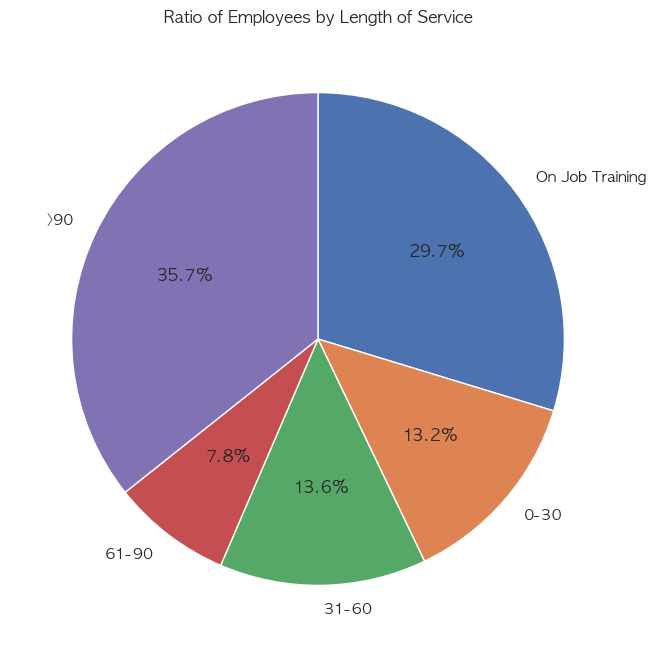

In [44]:
# Calculate the count of employees by tenure bucket
employee_count_by_tenure = cs_data['Tenure Bucket'].value_counts()

# Reorder 'On Job Training' to the first position for the pie plot
employee_count_by_tenure = employee_count_by_tenure.reindex(ordered_tenure_buckets)

# Plotting the pie chart of employee count by tenure bucket
plt.figure(figsize=(10, 8))
employee_count_by_tenure.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Ratio of Employees by Length of Service')
plt.ylabel('')  # Hide the y-label
plt.show()

# 근소기간별 고객 만족도 분포

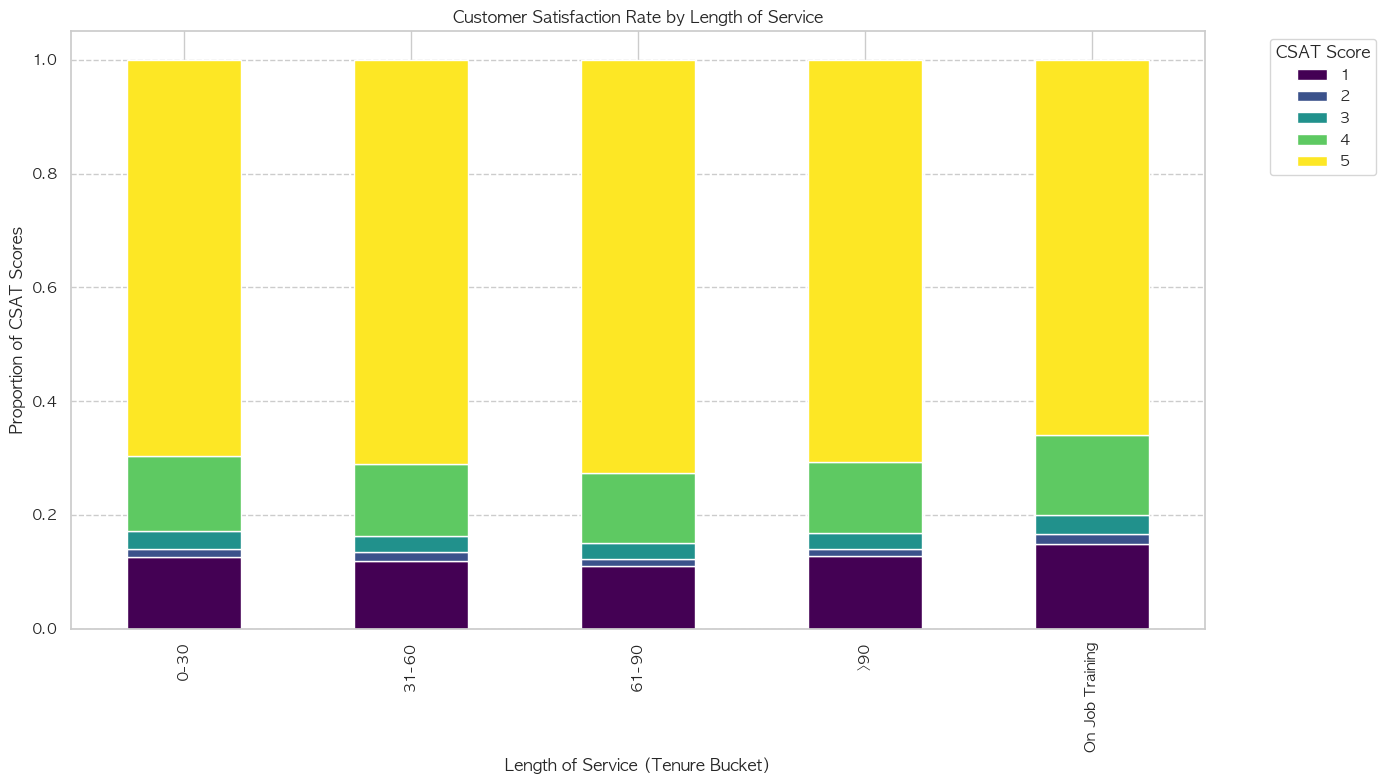

In [45]:
# Calculate the CSAT Score distribution by tenure bucket
csat_distribution_by_tenure = cs_data.groupby('Tenure Bucket')['CSAT Score'].value_counts(normalize=True).unstack(fill_value=0)

# Plotting the CSAT distribution for each tenure bucket as a stacked bar chart
csat_distribution_by_tenure.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Customer Satisfaction Rate by Length of Service')
plt.xlabel('Length of Service (Tenure Bucket)')
plt.ylabel('Proportion of CSAT Scores')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 데이터 초기화

In [57]:
cs = pd.read_csv('Customer_support_data.csv')
cs_data = cs.copy()

# 근속 기간 별 고객 만족도와 응답시간

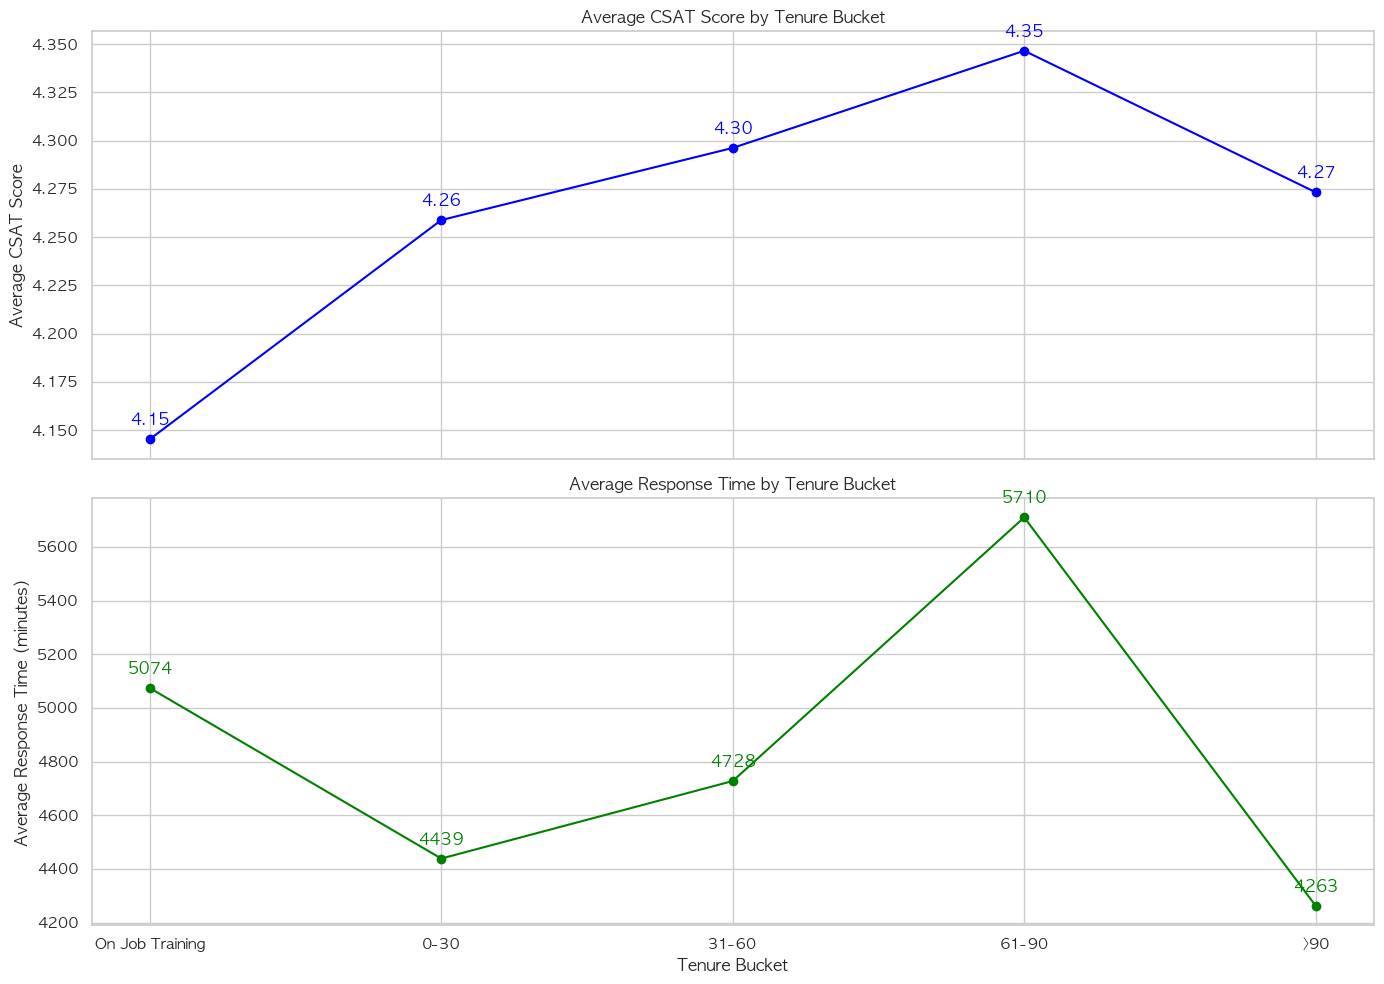

In [60]:
# Convert timestamps to datetime
cs_data['Issue_reported_at'] = pd.to_datetime(cs_data['Issue_reported at'], errors='coerce')
cs_data['issue_responded_at'] = pd.to_datetime(cs_data['issue_responded'], errors='coerce')

# Calculate response time in minutes
cs_data['response_time_minutes'] = (cs_data['issue_responded_at'] - cs_data['Issue_reported_at']).dt.total_seconds() / 60

cs_data['response_time_minutes'] = cs_data['response_time_minutes'].apply(lambda x: max(x, 0))

# Calculate the average CSAT Score by tenure bucket
average_csat_by_tenure = cs_data.groupby('Tenure Bucket')['CSAT Score'].mean()

# Calculate the average response time by tenure bucket
average_response_time_by_tenure = cs_data.groupby('Tenure Bucket')['response_time_minutes'].mean()

# Reorder 'On Job Training' to the first position for both CSAT and response time
ordered_tenure_buckets = ['On Job Training'] + [bucket for bucket in average_csat_by_tenure.index if bucket != 'On Job Training']
average_csat_by_tenure = average_csat_by_tenure.reindex(ordered_tenure_buckets)
average_response_time_by_tenure = average_response_time_by_tenure.reindex(ordered_tenure_buckets)

# Reorder 'On Job Training' to the first position for both CSAT and response time
ordered_tenure_buckets = ['On Job Training'] + [bucket for bucket in average_csat_by_tenure.index if bucket != 'On Job Training']
average_csat_by_tenure = average_csat_by_tenure.reindex(ordered_tenure_buckets)
average_response_time_by_tenure = average_response_time_by_tenure.reindex(ordered_tenure_buckets)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First subplot for average CSAT score by tenure bucket
axs[0].plot(average_csat_by_tenure.index, average_csat_by_tenure, marker='o', linestyle='-', color='blue')
axs[0].set_title('Average CSAT Score by Tenure Bucket')
axs[0].set_ylabel('Average CSAT Score')
axs[0].grid(True)

# Annotate the average CSAT scores on the first subplot
for i, csat_score in enumerate(average_csat_by_tenure):
    axs[0].annotate(f'{csat_score:.2f}', (i, csat_score), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

# Second subplot for average response time by tenure bucket
axs[1].plot(average_response_time_by_tenure.index, average_response_time_by_tenure, marker='o', linestyle='-', color='green')
axs[1].set_title('Average Response Time by Tenure Bucket')
axs[1].set_xlabel('Tenure Bucket')
axs[1].set_ylabel('Average Response Time (minutes)')
axs[1].grid(True)

# Annotate the average response times on the second subplot
for i, response_time in enumerate(average_response_time_by_tenure):
    axs[1].annotate(f'{response_time:.0f}', (i, response_time), textcoords="offset points", xytext=(0,10), ha='center', color='green')

# Adjust layout
plt.tight_layout()
plt.show()

# 데이터 초기화

In [69]:
cs = pd.read_csv('Customer_support_data.csv')
customer_support_data = cs.copy()

# 가격대별 고객 만족도

In [71]:
quartiles = customer_support_data['Item_price'].quantile([0.25, 0.5, 0.75])

conditions = [
    customer_support_data['Item_price'] <= quartiles[0.25],
    customer_support_data['Item_price'] <= quartiles[0.50],
    customer_support_data['Item_price'] <= quartiles[0.75],
    customer_support_data['Item_price'] > quartiles[0.75]
]

# Define the price range labels
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

# Create a new column in the dataframe with the price range category
customer_support_data['Price_Range'] = np.select(conditions, labels)

# Display the count of each category to verify
customer_support_data['Price_Range'].value_counts()

Price_Range
0              68701
Low             4304
Medium-Low      4303
High            4302
Medium-High     4297
Name: count, dtype: int64

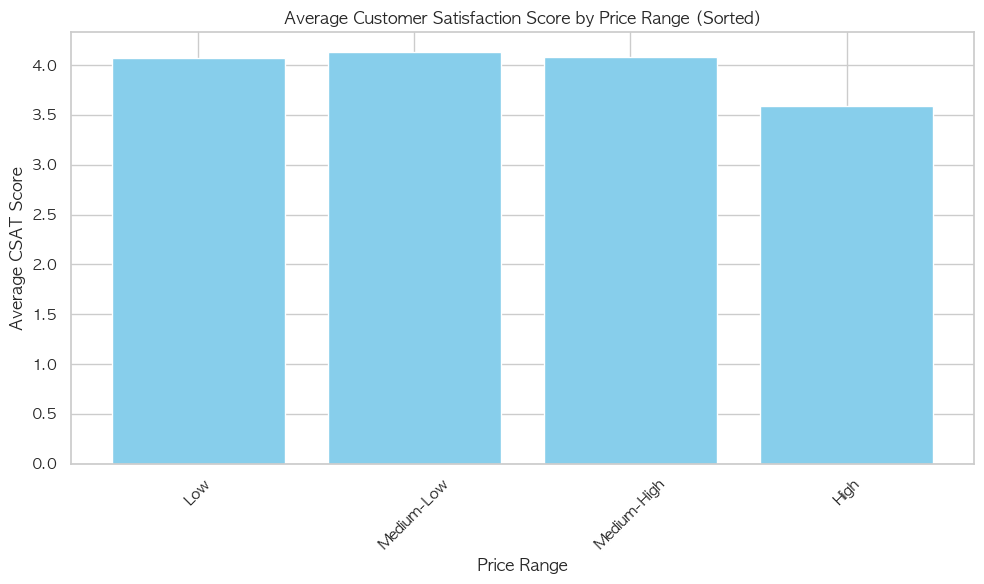

In [73]:
# Define a mapping of price ranges to an ordinal scale based on the quartiles
price_range_order = {'Low': 1, 'Medium-Low': 2, 'Medium-High': 3, 'High': 4}

# Map the price ranges to the ordinal scale
csat_avg_by_price_range_ordered = csat_avg_by_price_range.reset_index()
csat_avg_by_price_range_ordered['Price_Range_Ordinal'] = csat_avg_by_price_range_ordered['Price_Range'].map(price_range_order)

# Sort by the ordinal scale
csat_avg_by_price_range_ordered.sort_values('Price_Range_Ordinal', inplace=True)

# Plot the sorted average CSAT score for each price range
plt.figure(figsize=(10, 6))
plt.bar(csat_avg_by_price_range_ordered['Price_Range'], csat_avg_by_price_range_ordered['CSAT Score'], color='skyblue')
plt.title('Average Customer Satisfaction Score by Price Range (Sorted)')
plt.xlabel('Price Range')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Display the graph
plt.show()


# 가격대별 고객 문의량이 많은 sub-category

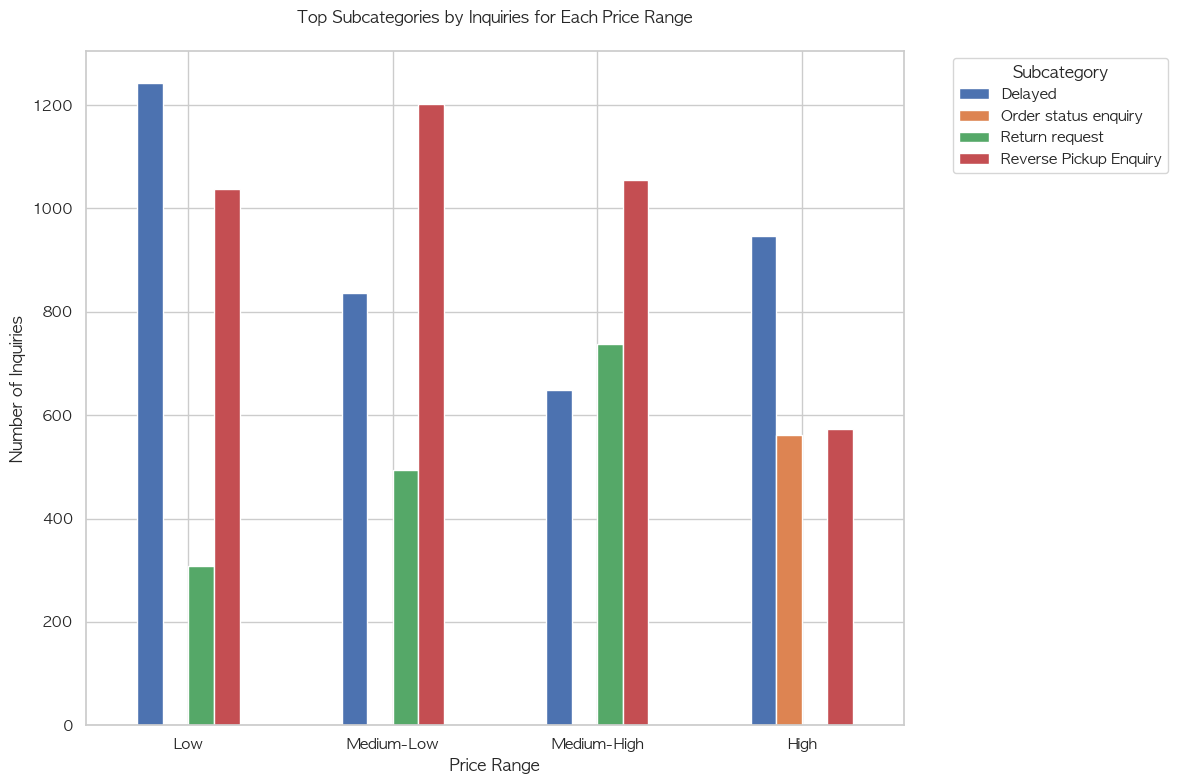

In [77]:
filtered_data = customer_support_data[customer_support_data['Price_Range'] != '0']

subcategory_count = filtered_data.groupby(['Price_Range', 'Sub-category']).size()

# To categorize by price on the x-axis, we will adjust the pivot to have price ranges as rows and subcategories as columns
top_subcategories_by_price_range = subcategory_count.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

# Re-pivot the dataframe to get the price ranges as rows
pivot_df_price_as_index = top_subcategories_by_price_range.reset_index().pivot(index='Price_Range', columns='Sub-category', values=0)

# Replace NaN with 0 as we are going to plot them
pivot_df_price_as_index.fillna(0, inplace=True)

# Since we have the price ranges in the index, we sort the index based on the ordinal mapping for consistency
pivot_df_price_as_index = pivot_df_price_as_index.reindex(labels)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# We will create a bar plot where each bar group represents a price range and each bar within the group represents a subcategory
pivot_df_price_as_index.plot(kind='bar', ax=ax)

# Titles and labels
ax.set_title('Top Subcategories by Inquiries for Each Price Range', pad=20)
ax.set_xlabel('Price Range')
ax.set_ylabel('Number of Inquiries')
ax.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.xticks(rotation=0)  # Keep the price range labels horizontal for readability
plt.tight_layout()
plt.show()

# 고객 만족도가 낮은 category 탐색 - order related

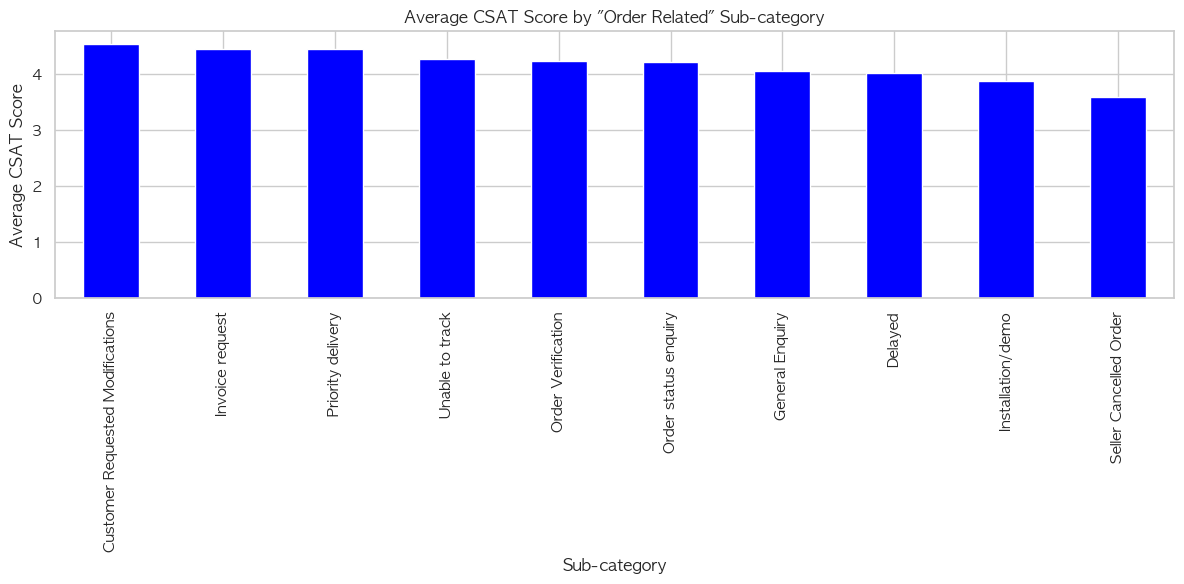

In [78]:
# To replicate the first graph from the provided screenshot, we need to plot the average CSAT score by subcategory
# for the 'Order Related' category. We assume that the data has been provided in a similar structure.

# Filter the data to include only 'Order Related' subcategories
order_related_data = customer_support_data[customer_support_data['category'] == 'Order Related']

# Group by 'Sub-category' and calculate the average CSAT score
order_related_csat_avg = order_related_data.groupby('Sub-category')['CSAT Score'].mean().sort_values(ascending=False)

# Plotting the average CSAT score by 'Order Related' subcategories
plt.figure(figsize=(12, 6))
order_related_csat_avg.plot(kind='bar', color='blue')
plt.title('Average CSAT Score by "Order Related" Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout

# Display the graph
plt.show()


## 고객 만족도 확인

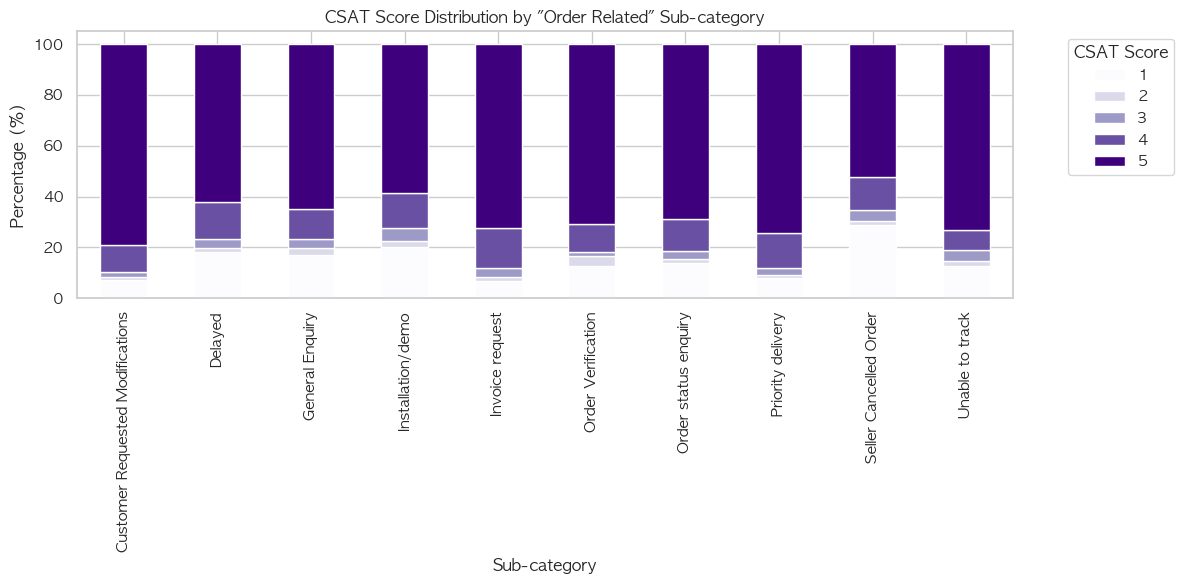

In [79]:
# To replicate the second graph from the provided screenshot, we need to plot the distribution of CSAT scores by subcategory
# for 'Order Related' category. This will require a stacked bar chart showing the percentage of each CSAT score within each subcategory.

# Prepare the data: count the occurrences of each CSAT score within each 'Order Related' sub-category
csat_score_distribution = order_related_data.groupby(['Sub-category', 'CSAT Score']).size().unstack(fill_value=0)

# Calculate the percentage of each CSAT score within each sub-category
csat_score_distribution_percentage = csat_score_distribution.div(csat_score_distribution.sum(axis=1), axis=0) * 100

# Plotting the CSAT score distribution by 'Order Related' subcategories as a stacked bar chart
csat_score_distribution_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Purples')

# Adding labels and title
plt.title('CSAT Score Distribution by "Order Related" Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Percentage (%)')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


# 고객 만족도가 낮은 category 탐색 - Product Queries

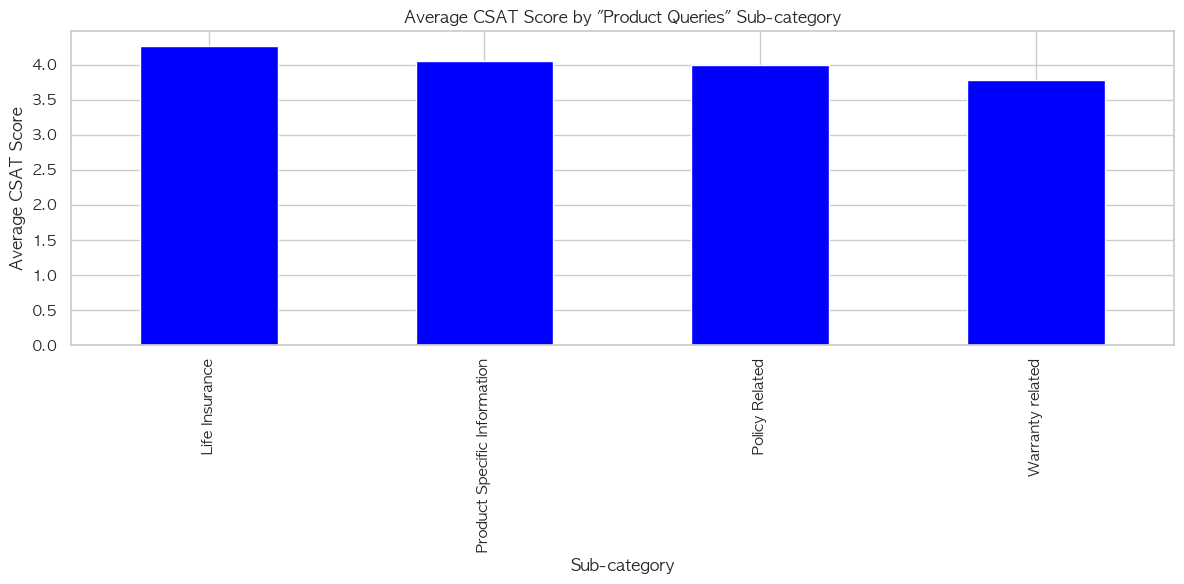

In [80]:
# For the third graph, we will be dealing with a different category, which is 'Product Queries'.
# We will follow a similar approach to create a bar graph of the average CSAT score by subcategory for the 'Product Queries' category.

# Filter the data to include only 'Product Queries' subcategories
product_queries_data = customer_support_data[customer_support_data['category'] == 'Product Queries']

# Group by 'Sub-category' and calculate the average CSAT score
product_queries_csat_avg = product_queries_data.groupby('Sub-category')['CSAT Score'].mean().sort_values(ascending=False)

# Plotting the average CSAT score by 'Product Queries' subcategories
plt.figure(figsize=(12, 6))
product_queries_csat_avg.plot(kind='bar', color='blue')
plt.title('Average CSAT Score by "Product Queries" Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout

# Display the graph
plt.show()


## 고객 만족도 확인

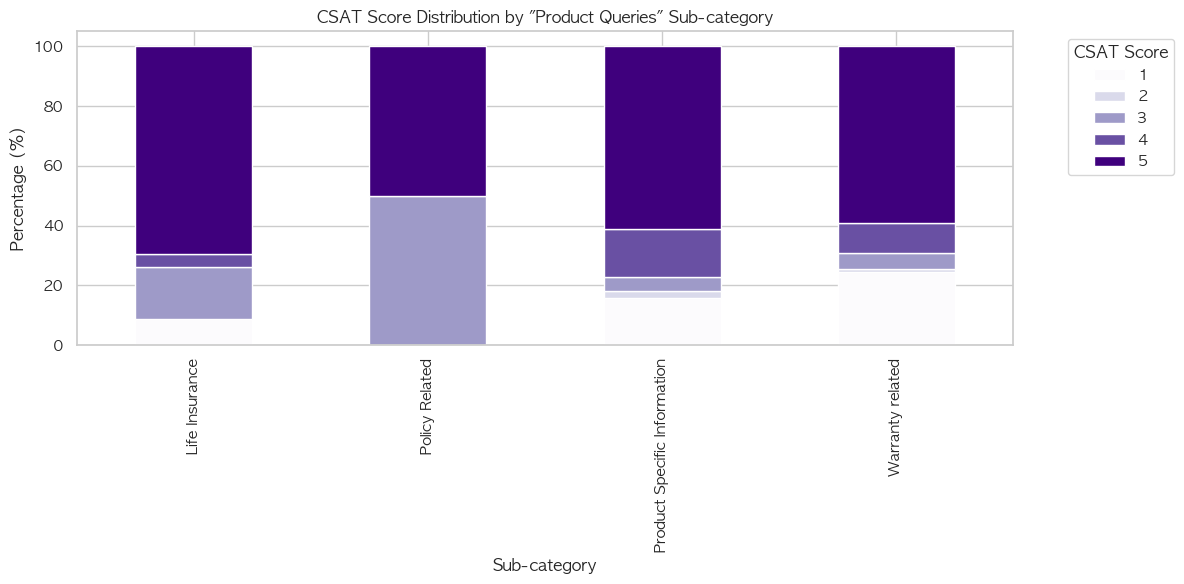

In [81]:
# For the final graph, we will plot the distribution of CSAT scores by subcategory for 'Product Queries' category.
# This will also be a stacked bar chart showing the percentage of each CSAT score within each subcategory.

# Prepare the data: count the occurrences of each CSAT score within each 'Product Queries' sub-category
product_queries_csat_distribution = product_queries_data.groupby(['Sub-category', 'CSAT Score']).size().unstack(fill_value=0)

# Calculate the percentage of each CSAT score within each sub-category
product_queries_csat_distribution_percentage = product_queries_csat_distribution.div(product_queries_csat_distribution.sum(axis=1), axis=0) * 100

# Plotting the CSAT score distribution by 'Product Queries' subcategories as a stacked bar chart
product_queries_csat_distribution_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Purples')

# Adding labels and title
plt.title('CSAT Score Distribution by "Product Queries" Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Percentage (%)')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


# 고객 만족도가 낮은 category 탐색 - Cancellation

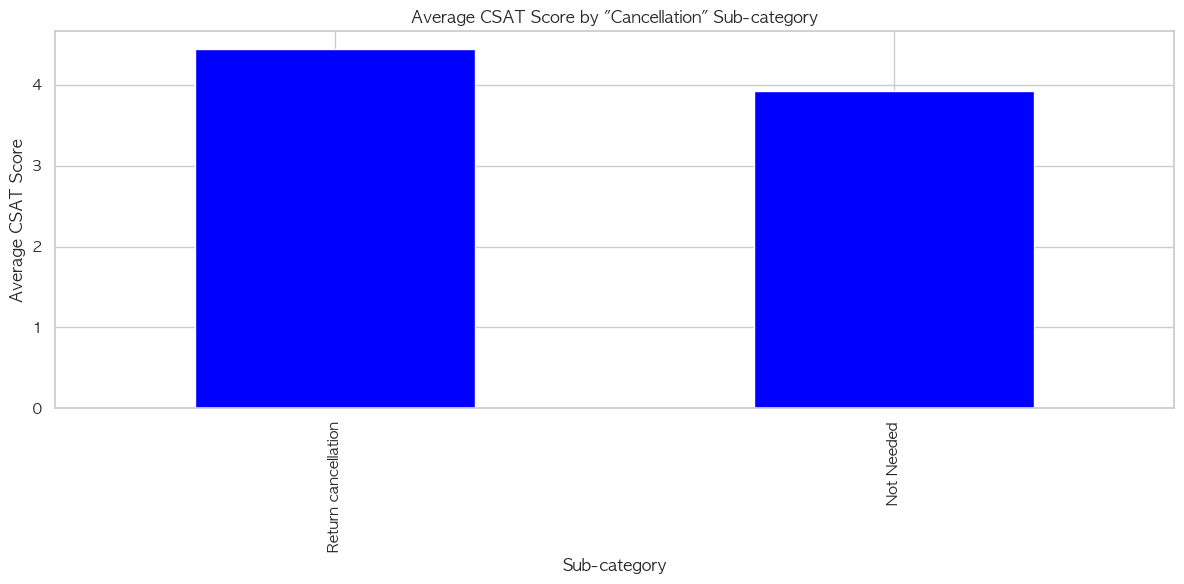

In [82]:
# To replicate the process for the 'Cancellation' category, we need to perform similar steps.
# First, we filter the data to include only 'Cancellation' subcategories.

# Filter the data
cancellation_data = customer_support_data[customer_support_data['category'] == 'Cancellation']

# For the average CSAT score graph
# Group by 'Sub-category' and calculate the average CSAT score
cancellation_csat_avg = cancellation_data.groupby('Sub-category')['CSAT Score'].mean().sort_values(ascending=False)

# Plotting the average CSAT score by 'Cancellation' subcategories
plt.figure(figsize=(12, 6))
cancellation_csat_avg.plot(kind='bar', color='blue')
plt.title('Average CSAT Score by "Cancellation" Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout

# Display the average CSAT score graph
plt.show()

## 고객 만족도

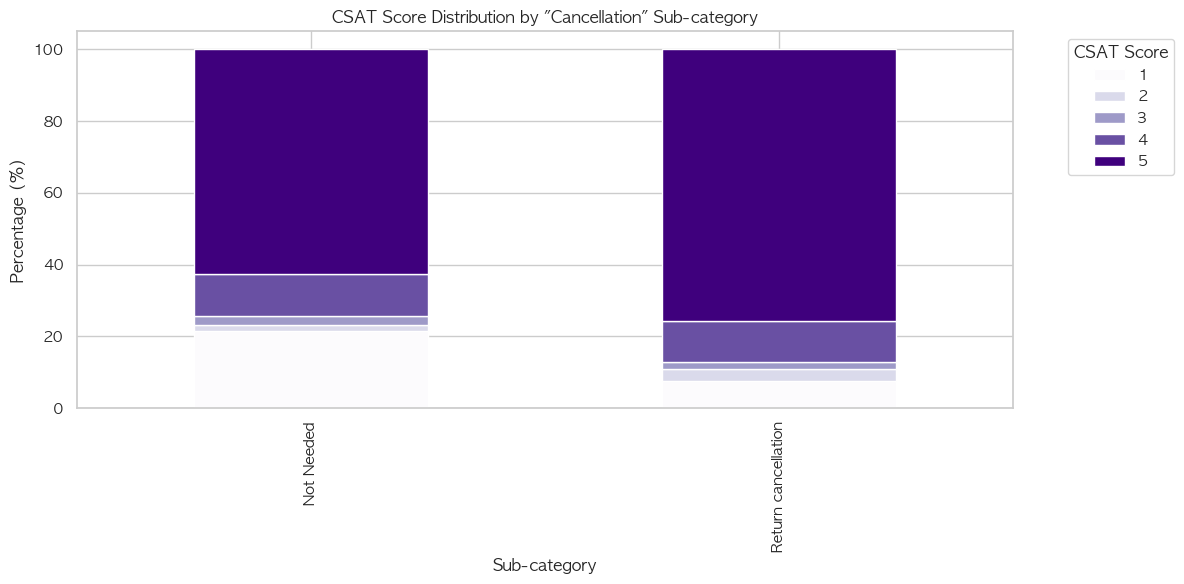

In [83]:

# For the CSAT score distribution graph
# Count the occurrences of each CSAT score within each 'Cancellation' sub-category
cancellation_csat_distribution = cancellation_data.groupby(['Sub-category', 'CSAT Score']).size().unstack(fill_value=0)

# Calculate the percentage of each CSAT score within each sub-category
cancellation_csat_distribution_percentage = cancellation_csat_distribution.div(cancellation_csat_distribution.sum(axis=1), axis=0) * 100

# Plotting the CSAT score distribution by 'Cancellation' subcategories as a stacked bar chart
cancellation_csat_distribution_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Purples')

# Adding labels and title
plt.title('CSAT Score Distribution by "Cancellation" Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Percentage (%)')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the CSAT score distribution graph
plt.tight_layout()  # Adjust the layout
plt.show()


마무리하며, 먼저 보내드린다고 하고 2주나 지나서 보내드려서 너무 죄송합니다. 데이터를 통합하는 과정에 있어 여러 잡음 및 데이터 명이 통일되지 않는 등등의 문제가 발생해서 gpt한테 시켜서 코드를 처음부터 끝까지 다시 만들었습니다. 각자 진행하신 부분들에 대해서 확인해보시고 추가적으로 진행하신 부분들의 경우 추가해서 포트폴리오를 만들면 좋을 것 같습니다.

완벽한 결과는 아니지만 이정도 퀄리티면 공모전에 출품을 해도 괜찮을 거라고 생각해요. cs 관련 지식이 포트폴리오 작성에 필요하시거나 아니면 자료를 정리하실 때 필요하시면 언제든지 말씀해주세요. 많이 늦었지만 다들 프로젝트 너무 열심히 해주셔서 감사합니다. 얼른 취직해서 현업에서 모두 뵐 수 있으면 좋겠어요. 다음 프로젝트가 될 수도 있겠지만요! 감사합니다.